# Prediction of Alzheimer 

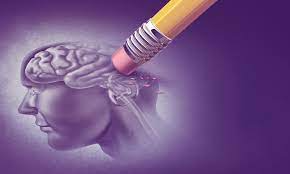

# Table of Contents
* [1. Problem statement](#Problem_statement)
    * [1.1. Data Dictionary](#Data_Dictionary)
    * [1.2. Objectives](#Obj)
    * [1.3. Hypothesis](#Approach)
    * [1.4. Approach](#Approach)
    
* [2. Data Cleaning and EDA](#Data_Cleaning_and_EDA)
   * [2.1. Import Libraries](#Lib)
   * [2.2. Load the data](#Loading)
   * [2.3. Cleaning data](#cleanData)
   * [2.4. Categorical Features](#CatF)
   * [2.5. Numerical Features](#NumF)
   * [2.6. Outliers](#Outliers)
   * [2.7. EDA](#EDA)
   * [2.8. Correlation](#Correlation)
          
* [3. Pre-processing and Training Data Development](#Process)
    * [3.1. Feature Engineering](#fEng)
    * [3.2. Scaling features](#Scaling)
    * [3.3. Machine learning algorithm](#algorithm)
        * [3.3.1. K-neighbor](#KNN)
        * [3.3.2. Support vector machine](#SVM)
        * [3.3.3.  Logistic Regression](#LR)
        * [3.3.4. Decision tree](#tree)  
        * [3.3.5. Random forest](#RF)
        * [3.3.6. Convolutional Neural Network](#CNN)
        * [3.3.7. Gradient Boosting](#GB)     
    * [3.4. Final Model](#Fmodel)
      * [3.4.1. Comparing Models](#comparemodels)
      * [3.4.2. Optimum Model](#Optimum)
      * [3.4.3. Save Model](#save)
    * [3.5. Recomendation](#Recommend)
   

# 1. Problem statement<a class="anchor" id="Problem_statement"></a>


This MRI data sets has been taken from Open Access Series of Imaging Studies (OASIS)
which is a project aimed at making MRI data sets of the brain freely available to the
scientific community. OASIS is made available by the Washington University Alzheimer’s
Disease Research Center, Dr. Randy Buckner at the Howard Hughes Medical Institute (HHMI)
at Harvard University, the Neuroinformatics Research Group (NRG) at Washington University
School of Medicine,and the Biomedical Informatics Research Network (BIRN).

This data set include two set of data, cross-sectional data (416 subjects) and longithudinal data (150 subjects)



**Cross-sectional MRI Data** in Young, Middle Aged, Nondemented and Demented Older Adults: This set consists of a cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD). Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a subsequent visit within 90 days of their initial session.

**Longitudinal MRI Data** in Nondemented and Demented Older Adults: This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

## 1.1. Data Dictionary<a class="anchor" id="Data_Dictionary"></a>

**id**: Id of individual 

**hand** : left or right hand

**CDR**: Clinical dementia rating scale for Staging patients( can be one of this number : 0, 0.5, 1, 2,3)
The CDR is based on a scale of 0–3: no dementia (CDR = 0), questionable dementia (CDR = 0.5), moderate cognitive impairment (CDR = 1), and severe cognitive impairment (CDR = 2)

**age**: Age of individual

**education**: Education level of individual 

**gender**: Gender of individual, F for female and M for Male

**SES**: socioeconomic status 

**MMSE**:  Mini-Mental State Exam for test of cognitive function

**eTIV**: Estimated Total Intracranial Volume of individual (sum of brain, ventricular, and extraventricular CSF)

**nWBV**: brain volumes of patient

 **ASF**: Atlas Scaling Factor to match each individual to the atlas target
 
 **visit**: Nth visit in logithudinal dataset 
 
 **Group**:  Show if individual is 'Nondemented', 'Demented' or 'Converted' in logithudinal dataset
 
 **MR Delay**: The time interval between current MRI scan and previous MR scan in logithudinal dataset
 
 **MR id**: id of MRS scan in logithudinal dataset

## 1.2. Objectives<a class="anchor" id="Obj"></a>

Dementia is the loss of thinking, remembering, and reasoning and behavioral abilities. The aim of this project is to detect dementia by exploring the interactions between the features collected from people who suffer from Dementia  and healthy subjects. 

## 1.3. Hypothesis<a class="anchor" id="Approach"></a>

## 1.4. Approach<a class="anchor" id="Approach"></a>


- Data cleaning and EDA 
- Evaluating few supervised machine learning models
- Finding the optimum predicting model for this project 

# 2. Data Cleaning and EDA<a class="anchor" id="Data_Cleaning_and_EDA)"></a>

## 2.1. Import Libraries<a class="anchor" id="Lib"></a>

In [540]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import seaborn as sns

from sklearn import tree, metrics
import seaborn as sns
from io import StringIO  
from IPython.display import Image  
from matplotlib.legend_handler import HandlerLine2D

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from itertools import product
import scipy.stats as ss

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler,OneHotEncoder



from sklearn.preprocessing import StandardScaler,OneHotEncoder
from itertools import product
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from keras.callbacks import EarlyStopping
import plotly.express as px



import pickle





## 2.2. Load the Data <a class="anchor" id="Loading"></a>


In [137]:
# First, make a variable called Cross-sec, and assign it to cross-sectional data
Cross_sec = pd.read_csv('Data/oasis_cross-sectional.csv', index_col= None)
# Second, make a second variable called Long-sec, and assign it to longitudinal data
Long_sec = pd.read_csv('Data/oasis_longitudinal.csv', index_col= None)

In [138]:
Cross_sec.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [139]:
Long_sec.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


## 2.3. Cleaning data <a class="anchor" id="cleanData"></a>

In [140]:
Long_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [141]:
Cross_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [142]:
 # Hand featur values for all observation,
pd.concat([Long_sec['Hand'],Cross_sec['Hand']]).unique()

array(['R'], dtype=object)

In [143]:
# So all the data are from right hand poeple, thefore we do not need to keep this column
Cross_sec = Cross_sec.drop(['Hand'], axis = 1)
Long_sec = Long_sec.drop(['Hand'], axis = 1)

In [144]:
Cross_sec.columns

Index(['ID', 'M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF',
       'Delay'],
      dtype='object')

In [145]:
Long_sec.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Age',
       'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [146]:
#### Renaming the similar columns in both group to the same name 
Cross_sec = Cross_sec.rename(columns={'ID':'MRI ID'})
Long_sec = Long_sec.rename(columns={'EDUC':'Educ'})

In [147]:
Cross_sec.head()

,MRI ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [148]:
Long_sec.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


**Cross_sec dataset**

In [149]:
Cross_sec.shape

(436, 11)

In [150]:
Cross_sec.isna().sum()

MRI ID      0
M/F         0
Age         0
Educ      201
SES       220
MMSE      201
CDR       201
eTIV        0
nWBV        0
ASF         0
Delay     416
dtype: int64

In cross_sec group, I removed the delay as there are many null values for this features.    

In [151]:
Cross_sec = Cross_sec.drop(['Delay'], axis = 1)

In [152]:
Cross_sec[Cross_sec['Educ'].isna()]['MMSE'].isna().sum()

201

In [153]:
Cross_sec[Cross_sec['Educ'].isna()]['CDR'].isna().sum()

201

In [154]:
Cross_sec[Cross_sec['SES'].isna()]['CDR'].isna().sum()

201

In [155]:
Cross_sec[Cross_sec['SES'].isna()]['MMSE'].isna().sum()

201

In [156]:
Cross_sec[Cross_sec['SES'].isna()]['Educ'].isna().sum()

201

There are 201 observation that have NAN value for MMSE, Educ, CDR, SES. I drop those observations from the data. These features are known as important parameters in alzhimer disease.  

In [157]:
Cross_sec_cl = Cross_sec[Cross_sec['CDR'].notna()]
Cross_sec_cl = Cross_sec_cl.reset_index(drop=True)

Cross_sec_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MRI ID  235 non-null    object 
 1   M/F     235 non-null    object 
 2   Age     235 non-null    int64  
 3   Educ    235 non-null    float64
 4   SES     216 non-null    float64
 5   MMSE    235 non-null    float64
 6   CDR     235 non-null    float64
 7   eTIV    235 non-null    int64  
 8   nWBV    235 non-null    float64
 9   ASF     235 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 18.5+ KB


In [158]:
Cross_sec_cl.isna().sum()

MRI ID     0
M/F        0
Age        0
Educ       0
SES       19
MMSE       0
CDR        0
eTIV       0
nWBV       0
ASF        0
dtype: int64

In [159]:
SES_np1 = Cross_sec_cl['SES'].to_numpy() 
SES_np1=SES_np1.reshape(-1, 1) 
imp1 = IterativeImputer(max_iter=10, random_state=0)
#imp.fit(SES_np)
Cross_sec_cl['SES']= imp.fit_transform(SES_np1)
Cross_sec_cl.isna().sum()

MRI ID    0
M/F       0
Age       0
Educ      0
SES       0
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

**Long_sec dataset**

In [160]:
Long_sec.shape

(373, 14)

In [161]:
Long_sec.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Age            0
Educ           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [162]:
#It is better to remove the null observation for MMSE, 
# MMSE is a mental test and important in evaluating dementia elevl and there are only two observations
#with Null value for MMSE.
Long_sec_cl = Long_sec
Long_sec_cl = Long_sec[Long_sec['MMSE'].notna()]
Long_sec_cl = Long_sec_cl.reset_index(drop=True)

In [163]:
# Filling NAN value using IterativeImputer method
SES_np = Long_sec_cl['SES'].to_numpy() 
SES_np=SES_np.reshape(-1, 1) 
imp = IterativeImputer(max_iter=10, random_state=0)
Long_sec_cl['SES']= imp.fit_transform(SES_np)
Long_sec_cl.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
Educ          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [164]:
Long_sec_cl['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [165]:
#Number of patients converted from non demetia to Dementia in longithudianl study
Long_sec_cl[Long_sec_cl['Group'] =='Converted']['Subject ID'].nunique()

14

In [166]:
#Number of patient with Dementia in longithudianl study
Long_sec_cl[Long_sec_cl['Group'] =='Demented']['Subject ID'].nunique()

64

In [167]:
#Number of patient with  no-Dementia in longithudianl study
Long_sec_cl[Long_sec_cl['Group'] =='Nondemented']['Subject ID'].nunique()

72

In [168]:
Long_sec_cl.groupby('Visit').count()

,Subject ID,MRI ID,Group,MR Delay,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,,,,,,,,,,,,,
1,150,150,150,150,150,150,150,150,150,150,150,150,150
2,143,143,143,143,143,143,143,143,143,143,143,143,143
3,57,57,57,57,57,57,57,57,57,57,57,57,57
4,15,15,15,15,15,15,15,15,15,15,15,15,15
5,6,6,6,6,6,6,6,6,6,6,6,6,6


- Number of visit is in range of 1 to 5, and number of individuals decrease as the number of visit increase.


**Merge cross sectional and longithudinal data**

since the size of data in both group are not big after cleaning for NAN values,I decided to merge two group cross-sec and long sec data . In longsec dataset, some of these data obtained from the same subject (Same subject ID) during study. I consider these repeated measurments as a new measurment. 

Therfore I removed few columns such as MR Delay, Group
, Visit, Subject ID from longitudinal data 

In [169]:
Long_sec_cl.drop(columns=['MR Delay', 'Group' , 'Visit', 'Subject ID'], inplace = True)

Before merging, it is better to look at the desciption of data and compare them together. 

In [170]:
Cross_sec.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000


In [171]:
Long_sec_cl.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,77.018868,14.611860,2.460452,27.342318,0.287062,1489.876011,0.729526,1.193776
std,7.660864,2.877737,1.107647,3.683244,0.371912,174.990473,0.037229,0.136533
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1358.500000,0.700000,1.098500
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1471.000000,0.729000,1.193000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1598.000000,0.756000,1.292000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


It seems that Education rating is different between two group Cross_sec and Long_sec

In [172]:
Cross_sec_cl['Educ'].unique()

array([2., 4., 5., 3., 1.])

In [173]:
Long_sec_cl['Educ'].unique()

array([14, 12, 18, 16,  8, 20, 13,  6, 17, 15, 23, 11])

In longithudinal data and cross sectional data, Education should be in the same merit. Education 1,2,3,4,5 in Cross_sec is equal to 'Elementry', 'High school', 'undergrad', 'grad', 'PhD'. So we should convert the longithudinal data to the same merit as in Cross sectional data as follow: 

In [174]:
Long_sec_cl['Educ'] = pd.cut(Long_sec_cl.Educ, [1,5, 12, 16, 19,23], labels=[1, 2, 3, 4, 5])

The data from cross sectional and longithudinal studies was conncatenated together. 

In [264]:
Cross_Long = pd.concat([Long_sec_cl,Cross_sec_cl])
Cross_Long = Cross_Long.rename(columns={'M/F':'gender'})

In [265]:
Cross_Long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MRI ID  606 non-null    object 
 1   gender  606 non-null    object 
 2   Age     606 non-null    int64  
 3   Educ    606 non-null    float64
 4   SES     606 non-null    float64
 5   MMSE    606 non-null    float64
 6   CDR     606 non-null    float64
 7   eTIV    606 non-null    int64  
 8   nWBV    606 non-null    float64
 9   ASF     606 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 52.1+ KB


I added one column called Dementia which has 1 for CDR > 0 and 0 for CDR = 0

In [266]:
Cross_Long['Dementia'] = 1
Cross_Long = Cross_Long.reset_index(drop=True)
Cross_Long.loc[Cross_Long.CDR == 0, 'Dementia'] =0 

In [267]:
Cross_Long.head()

,MRI ID,gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia
0,OAS2_0001_MR1,M,87,3.0,2.000000,27.0,0.0,1987,0.696,0.883,0
1,OAS2_0001_MR2,M,88,3.0,2.000000,30.0,0.0,2004,0.681,0.876,0
2,OAS2_0002_MR1,M,75,2.0,2.460452,23.0,0.5,1678,0.736,1.046,1
3,OAS2_0002_MR2,M,76,2.0,2.460452,28.0,0.5,1738,0.713,1.010,1
4,OAS2_0002_MR3,M,80,2.0,2.460452,22.0,0.5,1698,0.701,1.034,1


In [268]:
Cross_Long.shape

(606, 11)

So we have 11 features for 606 observations in the merge data 

## 2.4. Categorical Features<a class="anchor" id="CatF"></a>

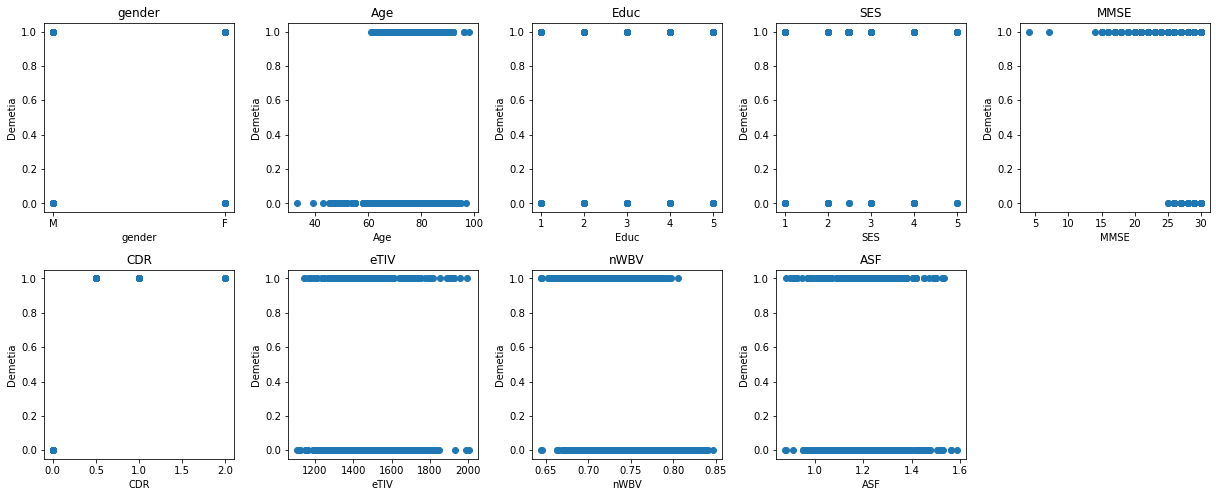

In [269]:
## Finding Categorical features by plot 

col= Cross_Long.columns.drop(['Dementia','MRI ID'])

fig = plt.figure(figsize=(17,10))
c=1
for i in col:
    plt.subplot(3, 5, c)
    plt.scatter( Cross_Long[i],Cross_Long['Dementia'])
    plt.title('{}'.format(i))
    plt.xlabel(i)
    plt.ylabel('Demetia')
    c = c + 1
fig.tight_layout()
plt.show()

##### There are 5  Categorical features including Gender, Educ, SES, Dementia and CDR. 

In [270]:
group_features = [{'Dementia':Cross_Long['Dementia'].unique()}, {'CDR':Cross_Long['CDR'].unique()},{'gender':Cross_Long['gender'].unique()},{'Educ':Cross_Long['Educ'].unique()} \
                  ,{'SES':Cross_Long['SES'].unique()}]

In [271]:
for i in range(0,len(group_features)):
    print(group_features[i])

{'Dementia': array([0, 1])}
{'CDR': array([0. , 0.5, 1. , 2. ])}
{'gender': array(['M', 'F'], dtype=object)}
{'Educ': array([3., 2., 4., 5., 1.])}
{'SES': array([2.        , 2.46045198, 3.        , 4.        , 1.        ,
       5.        , 2.49074074])}


In [272]:
Cross_Long.groupby('SES').count()

,MRI ID,gender,Age,Educ,MMSE,CDR,eTIV,nWBV,ASF,Dementia
SES,,,,,,,,,,
1.000000,138,138,138,138,138,138,138,138,138,138
2.000000,168,168,168,168,168,168,168,168,168,168
2.460452,17,17,17,17,17,17,17,17,17,17
2.490741,19,19,19,19,19,19,19,19,19,19
3.000000,131,131,131,131,131,131,131,131,131,131
4.000000,123,123,123,123,123,123,123,123,123,123
5.000000,10,10,10,10,10,10,10,10,10,10


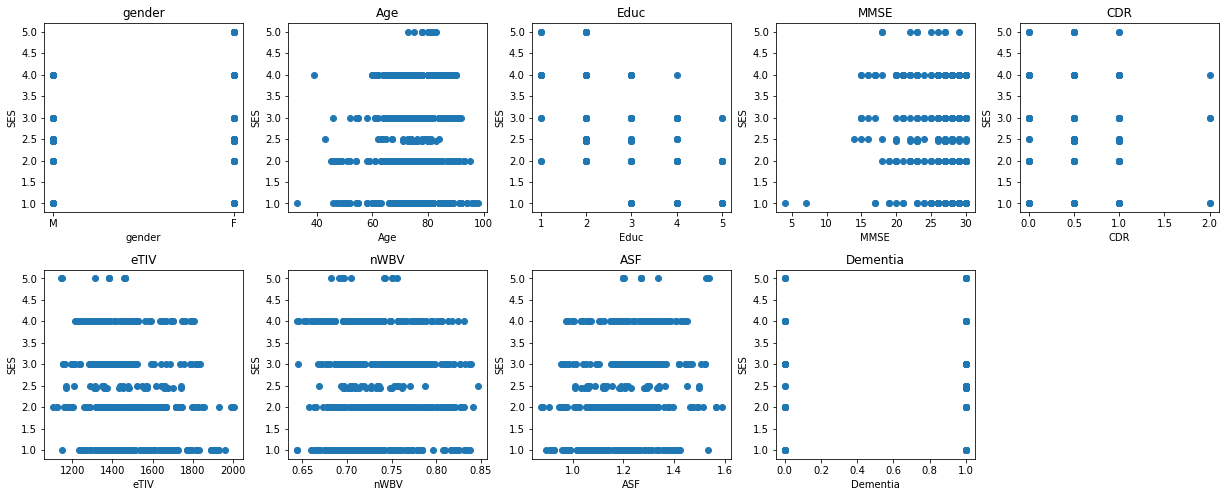

In [273]:
## Finding Categorical features by plot 

col= Cross_Long.columns.drop(['SES','MRI ID'])

fig = plt.figure(figsize=(17,10))
c=1
for i in col:
    plt.subplot(3, 5, c)
    plt.scatter( Cross_Long[i],Cross_Long['SES'])
    plt.title('{}'.format(i))
    plt.xlabel(i)
    plt.ylabel('SES')
    c = c + 1
fig.tight_layout()
plt.show()

There is no differetn pattern for other features related to SES. Thefore, I decided to get average of two values 2.46045198 and 2.49074074 and consider them as one group(2.5) 

In [274]:
Cross_Long['SES'].unique()

array([2.        , 2.46045198, 3.        , 4.        , 1.        ,
       5.        , 2.49074074])

In [275]:
round(np.mean([2.46045198,2.49074074]),1)

2.5

In [276]:
Cross_Long['SES'] = round(Cross_Long['SES'],1)

In [277]:
Cross_Long['SES'].unique()

array([2. , 2.5, 3. , 4. , 1. , 5. ])

**Distributions Of Feature Values**

In [278]:
Cross_Long = Cross_Long.reset_index(drop = True)

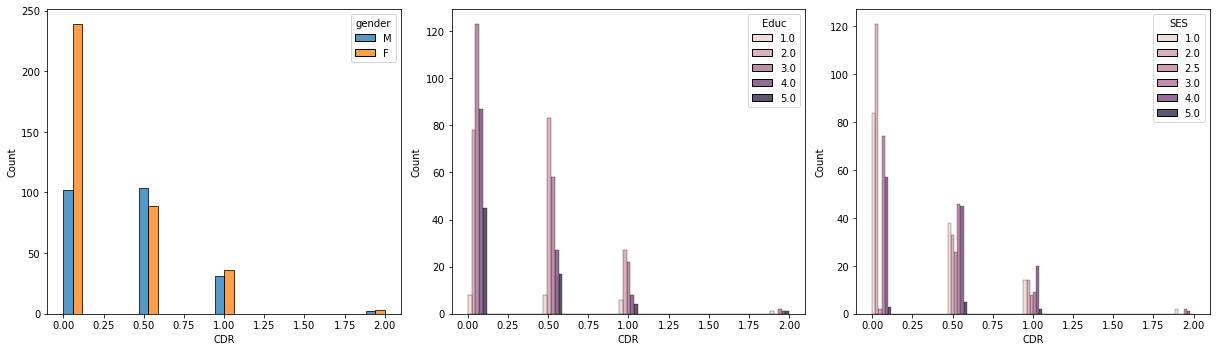

In [282]:
# looking at the histograom of categorical data to see if there is some akward category in categorical features. 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,5))

names = ['gender','Educ','SES']
# Iterating through axes and names
for name, ax in zip(names, axes.flatten()):
    sns.histplot(x='CDR',hue = name, data=Cross_Long, ax=ax, multiple = 'dodge')
fig.tight_layout()

- Gender: There is no same distribution of male and Female between different group of CDR, There is more female for CDR = 0 ( twice), more male for CDR= 0.5, more female for CDR =1. the numbe rof participants decrease with increaing the dementia level, CDR value. 

- Most Participant in different group with CDR > 0 have diploma except. People with no dementia, CDR = 0, has mostly bachelor degree, 

- SES of participants is distributed over different range of 1-5 . There are less participant with high SES , SES= 5 in all group. 

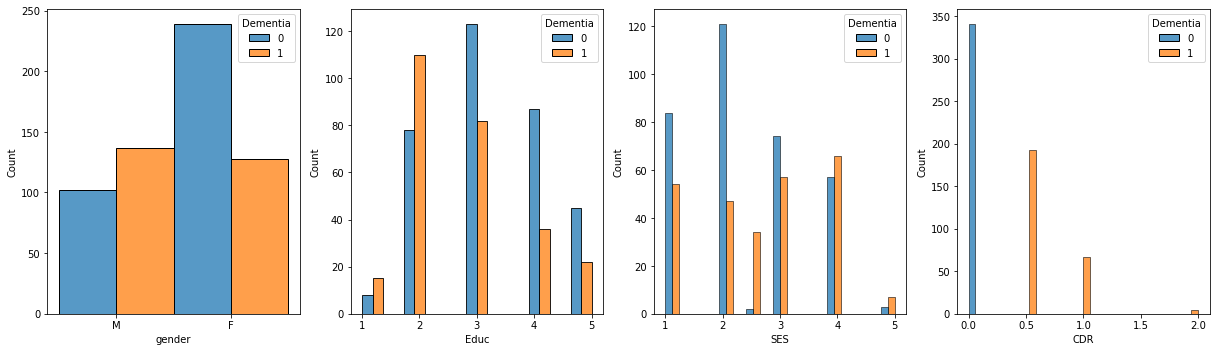

In [284]:
# looking at the histograom of categorical data to see if there is some akward category in categorical features. 

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,5))

names = ['gender','Educ','SES','CDR']
# Iterating through axes and names
for name, ax in zip(names, axes.flatten()):
    sns.histplot(x=name,hue = 'Dementia', data=Cross_Long, ax=ax, multiple = 'dodge')
fig.tight_layout()

- Number of female is higher in participant with no dementia 
- In group of higher education, Educ >3, number of people with no Dementia are more, while for lower education, educ <3, number of people with dementia are more. 
- For very hight level of SES, SES =4 , and 5, number of people with dementia is higher. While for SES < 4, number of people with no dementia is higher. 
- Number of people with no dementia is much higher than other group. There are low number of people with severe dementia, namely CDR =2.  

**There is imbalance in distribution of observations for different CDR. In this step of project, I made decision to only focuse on prediction of dementia in patients, and not severiety of Dementia**

## 2.5. Numerical Features <a class="anchor" id="NumF"></a>

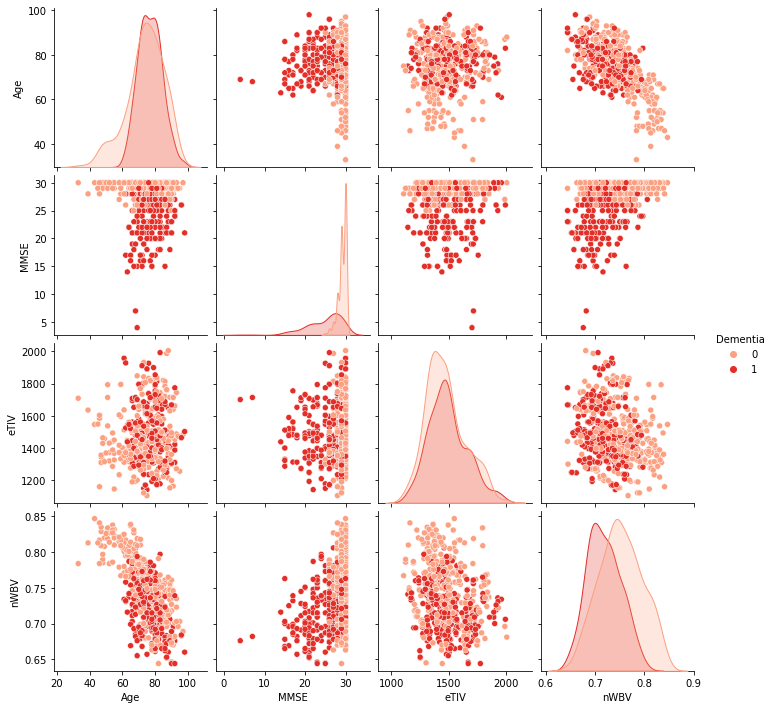

In [286]:
sns.pairplot(Cross_Long[["Age","MMSE","eTIV",'nWBV', 'Dementia']],hue="Dementia",diag_kind="kde", palette ='Reds')

- Distribution of Age is slightly wider for no dementia 
- Distribution of MMSE is more narrow and shifted to the left in dementia compared with no- dementia
- Distribution of eTIV does not seem different between two groups.
- Distribution of nWBV is slighly shifted to the samller volume in dementia compared with no-dementia. 
- Scatter plot shows visible correlation between nWBV and Age, eTIV and nWBV( the correaltion significance will be evaluated later in this project)

## 2.6. Outliers<a class="anchor" id="Outliers"></a>

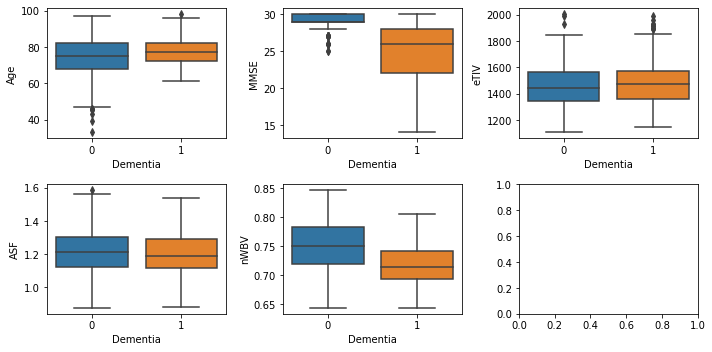

In [349]:
#Box plot of numerical features

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))

names = ['Age','MMSE','eTIV','ASF','nWBV']
# Iterating through axes and names
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=name, x= "Dementia", data=Cross_Long, orient='v', ax=ax)
plt.tight_layout()

**Age outlier**

**No-Demetia group**

In [342]:
#Fidning the lower Wisker line for MMSE

IQR = Cross_Long[Cross_Long['Dementia'] ==0].Age.quantile(0.75)- Cross_Long[Cross_Long['Dementia'] ==0].Age.quantile(0.25)
Cross_Long[Cross_Long['Dementia'] ==0]['Age'].quantile(0.25) - 1.5*IQR

47.0

In [343]:
#observation in outlier range
Cross_Long[Cross_Long['Age']<47]

,MRI ID,gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia
379,OAS1_0018_MR1,M,39,3.0,4.0,28.0,0.0,1636,0.813,1.073,0
401,OAS1_0058_MR1,F,46,5.0,1.0,30.0,0.0,1585,0.817,1.107,0
409,OAS1_0069_MR1,M,33,4.0,1.0,30.0,0.0,1709,0.784,1.027,0
414,OAS1_0074_MR1,M,43,4.0,2.5,30.0,0.0,1547,0.847,1.134,0
500,OAS1_0262_MR1,M,46,2.0,3.0,30.0,0.0,1604,0.784,1.094,0
560,OAS1_0366_MR1,F,45,5.0,2.0,29.0,0.0,1549,0.813,1.133,0
561,OAS1_0367_MR1,F,46,2.0,2.0,28.0,0.0,1161,0.841,1.511,0


**Demetia group**

In [329]:
#Fidning the higher Wisker line for MMSE

IQR = Cross_Long[Cross_Long['Dementia'] ==1].Age.quantile(0.75)- Cross_Long[Cross_Long['Dementia'] ==1].Age.quantile(0.25)
Cross_Long[Cross_Long['Dementia'] ==1]['Age'].quantile(0.75) + 1.5*IQR

97.0

In [344]:
#observation in outlier range

Cross_Long[Cross_Long['Age']>97]

,MRI ID,gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia
184,OAS2_0087_MR2,F,98,4.0,1.0,21.0,2.0,1503,0.66,1.168,1


The data fror this study was gathered from Adult people and the range of Age in outlier is not a wierd age. So I made deicison to keep the observation for age outlier  

**MMSE outlier**

**No-Dementia group**

In [307]:
#Fidning the lower Wisker line for MMSE
IQR = Cross_Long[Cross_Long['Dementia'] ==0].MMSE.quantile(0.75)- Cross_Long[Cross_Long['Dementia'] ==0].MMSE.quantile(0.25)
Cross_Long[Cross_Long['Dementia'] ==0]['MMSE'].quantile(0.25) - 1.5*IQR

27.5

(array([ 2.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0., 14.]),
 array([25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.2, 26.4, 26.6, 26.8, 27. ]),
 <BarContainer object of 10 artists>)

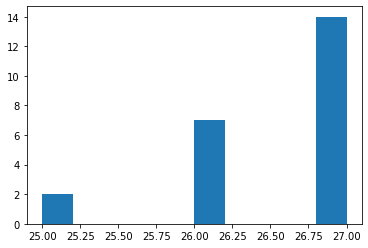

In [336]:
#plot the number of observation in MMSE outlier  and their frequent for MMSE 
plt.hist(Cross_Long[(Cross_Long['MMSE']<27.5) & (Cross_Long['Dementia']==0)]['MMSE'])

The MMSE observations in MMSE outlier for no dementia spread close to each othe and also are very close to wisker line, therfore I made decision to keep these outlier 

**Dementia group**

In [345]:
#Fidning the lower Wisker line for MMSE
IQR = Cross_Long[Cross_Long['Dementia'] ==1].MMSE.quantile(0.75)- Cross_Long[Cross_Long['Dementia'] ==1].MMSE.quantile(0.25)
Cross_Long[Cross_Long['Dementia'] ==1]['MMSE'].quantile(0.25) - 1.5*IQR

13.0

In [337]:
#observation in outlier range
Cross_Long[(Cross_Long['MMSE']<13) & (Cross_Long['Dementia']==1)]

,MRI ID,gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia
100,OAS2_0048_MR4,M,68,3.0,1.0,7.0,1.0,1714,0.682,1.024,1
101,OAS2_0048_MR5,M,69,3.0,1.0,4.0,1.0,1701,0.676,1.032,1


These two observations for MMSE < 13 in dementia group are far from wosker, thefore I made deicsion to remove them

In [339]:
Cross_Long = Cross_Long[(Cross_Long['MMSE']>13)]

**eTIV outlier**

**No-Dementia group**

In [346]:
#Finding the higher wisker line

IQR = Cross_Long[Cross_Long['Dementia'] ==0].eTIV.quantile(0.75)- Cross_Long[Cross_Long['Dementia'] ==0].eTIV.quantile(0.25)
Cross_Long[Cross_Long['Dementia'] ==0]['eTIV'].quantile(0.75) + 1.5*IQR

1883.5

In [324]:
#Observation in outliner range
Cross_Long[(Cross_Long['eTIV']>1883.5) & (Cross_Long['Dementia']==0)]

,MRI ID,gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia
0,OAS2_0001_MR1,M,87,3.0,2.0,27.0,0.0,1987,0.696,0.883,0
1,OAS2_0001_MR2,M,88,3.0,2.0,30.0,0.0,2004,0.681,0.876,0
167,OAS2_0077_MR2,M,73,3.0,2.0,29.0,0.0,1931,0.722,0.909,0


**Dementia group**

In [322]:
#Finding the higher wisker line
IQR = Cross_Long[Cross_Long['Dementia'] ==1].eTIV.quantile(0.75)- Cross_Long[Cross_Long['Dementia'] ==1].eTIV.quantile(0.25)
Cross_Long[Cross_Long['Dementia'] ==1]['eTIV'].quantile(0.75) + 1.5*IQR

1905.0

In [326]:
#Observation in outliner range
Cross_Long[(Cross_Long['eTIV']>1905.0) & (Cross_Long['Dementia']==1)]

,MRI ID,gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia
39,OAS2_0021_MR1,M,72,5.0,1.0,26.0,0.5,1911,0.719,0.919,1
40,OAS2_0021_MR2,M,76,5.0,1.0,25.0,0.5,1926,0.736,0.911,1
139,OAS2_0066_MR1,M,61,4.0,1.0,30.0,1.0,1957,0.734,0.897,1
140,OAS2_0066_MR2,M,62,4.0,1.0,30.0,0.5,1928,0.731,0.910,1
431,OAS1_0115_MR1,M,72,5.0,1.0,26.0,0.5,1911,0.726,0.919,1
519,OAS1_0290_MR1,M,83,3.0,2.0,26.0,0.5,1992,0.706,0.881,1


There is slightly correaltion between eTIV and nWBV in scatter plot, so lets look at those plto. 

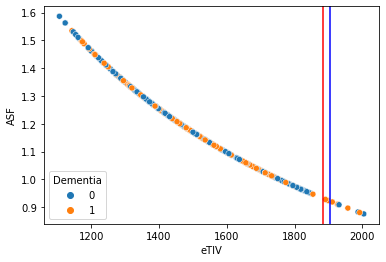

In [394]:
#plot the scatter plot for eTIV and nWBV with lines showing the eTIV outliers.
graph = sns.scatterplot(data=Cross_Long, x="eTIV", y="ASF", hue="Dementia")
graph.axvline(1905, color ='b')
graph.axvline(1883.5, color= 'r')
plt.show()

There is no visible pattern for eTIV outlier and nWBV. So I made decision to keep those outlier. 

**ASF outlier**

**No-Dementia group** 

In [327]:
#Finding the higher wisker line
IQR = Cross_Long[Cross_Long['Dementia'] ==0].ASF.quantile(0.75)- Cross_Long[Cross_Long['Dementia'] ==0].ASF.quantile(0.25)
Cross_Long[Cross_Long['Dementia'] ==0]['ASF'].quantile(0.75) + 1.5*IQR

1.5739999999999998

In [328]:
#Observation in outliner range
Cross_Long[(Cross_Long['ASF']>1.57) & (Cross_Long['Dementia']==0)]

,MRI ID,gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia
282,OAS2_0138_MR2,F,75,3.0,2.0,28.0,0.0,1106,0.767,1.587,0


This outlier is very close to wisker line, so I made deicison to keep it. 

In [358]:
Cross_Long.shape

(604, 11)

In [359]:
Cross_Long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 605
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MRI ID    604 non-null    object 
 1   gender    604 non-null    object 
 2   Age       604 non-null    int64  
 3   Educ      604 non-null    float64
 4   SES       604 non-null    float64
 5   MMSE      604 non-null    float64
 6   CDR       604 non-null    float64
 7   eTIV      604 non-null    int64  
 8   nWBV      604 non-null    float64
 9   ASF       604 non-null    float64
 10  Dementia  604 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 56.6+ KB


In [146]:
#Removing CDR columns as Dementia obtained from CDR 
Cross_Long.drop(columns=['CDR'], inplace = True)
Cross_Long.head()

,MRI ID,gender,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Dementia
0,OAS2_0001_MR1,M,87,14.0,2.000000,27.0,1987,0.696,0.883,0
1,OAS2_0001_MR2,M,88,14.0,2.000000,30.0,2004,0.681,0.876,0
2,OAS2_0002_MR1,M,75,12.0,2.460452,23.0,1678,0.736,1.046,1
3,OAS2_0002_MR2,M,76,12.0,2.460452,28.0,1738,0.713,1.010,1
4,OAS2_0002_MR3,M,80,12.0,2.460452,22.0,1698,0.701,1.034,1


## 2.7. EDA<a class="anchor" id="EDA"></a>

**Gender**

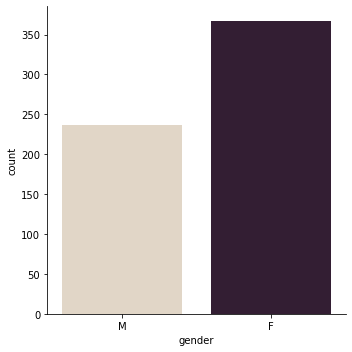

In [363]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=Cross_Long)


In [368]:
# calculate the difference between male and female number in percenage
(Cross_Long[Cross_Long['gender'] =='F']['gender'].count() - Cross_Long[Cross_Long['gender'] =='M']['gender'].count())\
/Cross_Long['gender'].count() *100


21.52317880794702

- There are 20 % more female than male in the study. 

**Education** 

In [360]:
plottepm = Cross_Long.copy(deep=True)

In [361]:
Long_sec_cl['Educ'] = pd.cut(Long_sec_cl.Educ, [1,2, 3, 4, 5,6], labels=['Elementry', 'High school', 'undergrad', 'grad', 'PhD'])

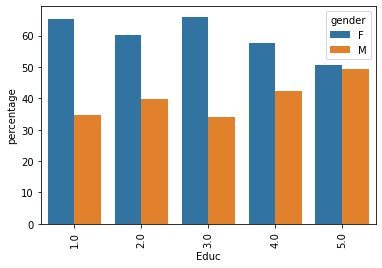

In [362]:
#sns.catplot(x="Educ", hue="gender", kind="count", data=plottepm)


education_counts = (plottepm.groupby(['Educ'])['gender']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Educ'))
p = sns.barplot(x="Educ", y="percentage", hue="gender", data=education_counts)

_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels



- The number of female in each education group below PhD is higher than male. 

**Socioeconomic status(SES)**

Socioeconomic status is an economic and sociological combined total measure of a person's work experience and of an individual's or family's economic access to resources and social position in relation to others. 


In [371]:
plottepm = Cross_Long.copy(deep=True)

In [372]:
plottepm['SES'] = pd.cut(plottepm.SES, [1,2, 3, 5], labels=['Poor', 'Meidum', 'Rich'])

<AxesSubplot:xlabel='SES', ylabel='percentage'>

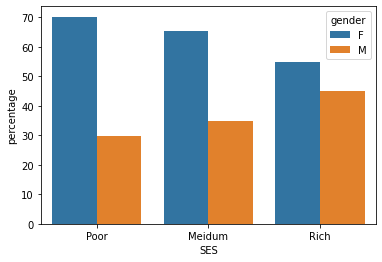

In [373]:

SES_counts = (plottepm.groupby(['SES'])['gender']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('SES'))

sns.barplot(x="SES",y='percentage', hue="gender", data=SES_counts)



- AS the SES level increase, the number of man participant increases. 

**CDR**

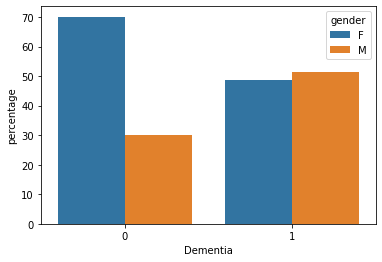

In [374]:
CDR_counts = (Cross_Long.groupby(['Dementia'])['gender']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Dementia'))

p = sns.barplot(x="Dementia", y="percentage", hue="gender", data=CDR_counts)
_ = plt.setp(p.get_xticklabels(), rotation=0)  # Rotate labels




In [376]:
# calculate the difference between male and female number in percenage
Cross_Long[Cross_Long['Dementia'] ==1]['Dementia'].count()\
/Cross_Long['Dementia'].count() *100

43.54304635761589

- 40 % percent of subjects sufferers from Dementia
- Number of women  in no-dementia is twice as number of man. In dementia, the number of man and women is approximately same.


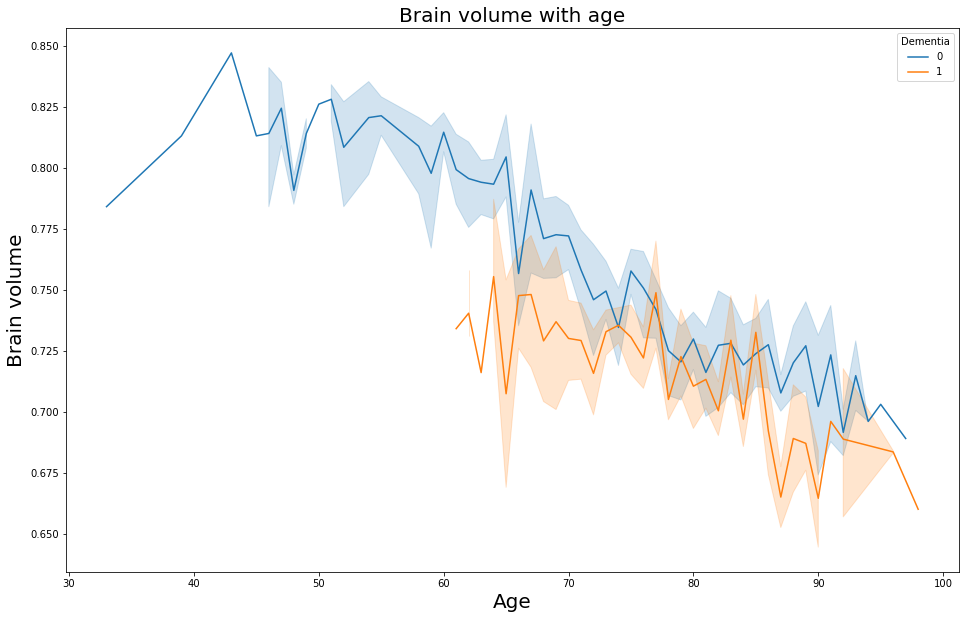

In [378]:
plt.figure(figsize=(16,10))
sns.lineplot(y="nWBV",x="Age",data=Cross_Long, hue ='Dementia')
plt.title('Brain volume with age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Brain volume',fontsize=20)
plt.show()

- There is similar trend in shrinkage of brain volume with age in both no dementia and dementia group

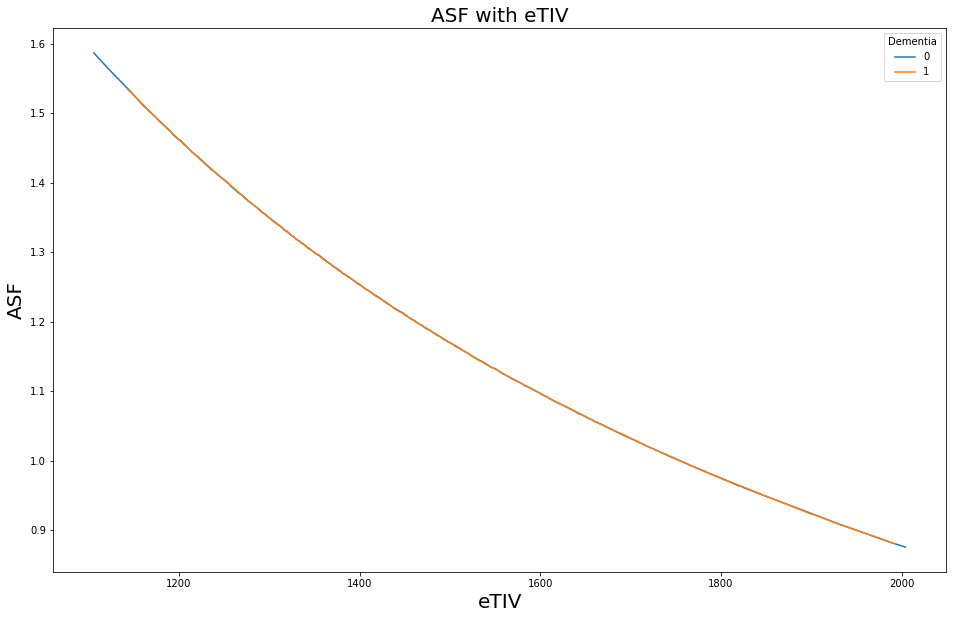

In [387]:
plt.figure(figsize=(16,10))
sns.lineplot(y="ASF",x="eTIV",data=Cross_Long, hue ='Dementia')
plt.title('ASF with eTIV',fontsize=20)
plt.xlabel('eTIV',fontsize=20)
plt.ylabel('ASF',fontsize=20)
plt.show()

- There is an exponential decay of ASF with eTIV in both dementia and no-dementia group

In [377]:
Cross_Long.columns

Index(['MRI ID', 'gender', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF', 'Dementia'],
      dtype='object')

## 2.8. Correlation <a class="anchor" id="Correlation"></a>

In [400]:
#Overal Correlation between continuous variable 
Cross_Long[['Age','MMSE','eTIV','nWBV','ASF','Dementia']].corr()

,Age,MMSE,eTIV,nWBV,ASF,Dementia
Age,1.000000,-0.104281,0.061514,-0.653359,-0.054306,0.146628
MMSE,-0.104281,1.000000,0.007753,0.374489,0.001858,-0.612411
eTIV,0.061514,0.007753,1.000000,-0.219431,-0.989221,0.056536
nWBV,-0.653359,0.374489,-0.219431,1.000000,0.221533,-0.387806
ASF,-0.054306,0.001858,-0.989221,0.221533,1.000000,-0.061416
Dementia,0.146628,-0.612411,0.056536,-0.387806,-0.061416,1.000000


- There is an strong correlation between ASF and eTIV. 

/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.1, 0.1, 'correlation= -65%')

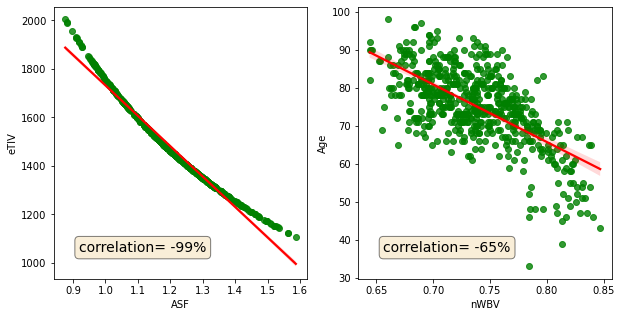

In [411]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
sns.regplot(Cross_Long['ASF'],Cross_Long['eTIV'],scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'}, ax=axes[0])
sns.regplot(Cross_Long['nWBV'],Cross_Long['Age'],scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'}, ax=axes[1])


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

axes[0].text(0.10, 0.10, 'correlation= -99%', transform=axes[0].transAxes, fontsize=14,
       multialignment='left',bbox=props)
axes[1].text(0.10, 0.10, 'correlation= -65%', transform=axes[1].transAxes, fontsize=14,
       multialignment='left',bbox=props)



In [401]:
# Correlation between continuous variable for individual groups (Dementia and no Dementia )
Cross_Long_D = Cross_Long[Cross_Long['Dementia']==1]
Cross_Long_ND = Cross_Long[Cross_Long['Dementia']==0]

In [403]:
Cross_Long_D[['Age','MMSE','eTIV','nWBV','ASF']].corr()

,Age,MMSE,eTIV,nWBV,ASF
Age,1.000000,0.038221,-0.047287,-0.454598,0.043536
MMSE,0.038221,1.000000,0.062790,0.313290,-0.047328
eTIV,-0.047287,0.062790,1.000000,-0.119811,-0.989032
nWBV,-0.454598,0.313290,-0.119811,1.000000,0.130211
ASF,0.043536,-0.047328,-0.989032,0.130211,1.000000


In [404]:
Cross_Long_ND[['Age','MMSE','eTIV','nWBV','ASF']].corr()

,Age,MMSE,eTIV,nWBV,ASF
Age,1.000000,-0.149128,0.103264,-0.733199,-0.088408
MMSE,-0.149128,1.000000,0.068310,0.078781,-0.075794
eTIV,0.103264,0.068310,1.000000,-0.272818,-0.989409
nWBV,-0.733199,0.078781,-0.272818,1.000000,0.265680
ASF,-0.088408,-0.075794,-0.989409,0.265680,1.000000


- The negative correlation between Age and nWBV increased in Dementia compared with no Dementia (-0.73 versus -0.45)

In [405]:
# Evaluating the signifcance of features changes between two groups 

In [178]:
stats.ttest_ind(Cross_Long[Cross_Long['Dementia'] ==0]['MMSE'], Cross_Long[Cross_Long['Dementia'] ==1]['MMSE']) 

Ttest_indResult(statistic=18.279746073543986, pvalue=9.575715300889582e-60)

In [179]:
stats.ttest_ind(Cross_Long[Cross_Long['Dementia'] ==0]['Age'], Cross_Long[Cross_Long['Dementia'] ==1]['Age']) 

Ttest_indResult(statistic=-3.567436534810806, pvalue=0.000389068143039792)

In [181]:
stats.ttest_ind(Cross_Long[Cross_Long['Dementia'] ==0]['nWBV'], Cross_Long[Cross_Long['Dementia'] ==1]['nWBV']) 

Ttest_indResult(statistic=10.437378017272072, pvalue=1.467758321940503e-23)

In [434]:
stats.ttest_ind(Cross_Long[Cross_Long['Dementia'] ==0]['ASF'], Cross_Long[Cross_Long['Dementia'] ==1]['ASF']) 

Ttest_indResult(statistic=1.509733167057354, pvalue=0.13163618917452594)

In [435]:
stats.ttest_ind(Cross_Long[Cross_Long['Dementia'] ==0]['eTIV'], Cross_Long[Cross_Long['Dementia'] ==1]['eTIV']) 

Ttest_indResult(statistic=-1.3893715119361925, pvalue=0.1652334674667111)

There is a significant difference between ctrl group and Dementia group in following features:
    MMSE,Age, nWBV

| Features | Age | MMSE | nWBV |
|---:|:-------------|:------|:------|
|p-value|4.0e-4|9.6e-60|1.5 e-23

In [398]:
# Define function for chi-square test tp calcualte the p-value for correlation of categorical features
def coeff_cat(data,df1):
    """
    coeff_cat: Function for calcualting the correlation between ategorical group using Chi-square test 
    df1= categorical features
    input: Data in Dataframe format 
    output: The  p value of Chi-square test which shows signifcant correlation beyween features if p-value <0 
    """
    df2 =df1
    df_prod = list(product(df1,df1, repeat = 1))

    result = []
    for i in df_prod:
        if i[0] != i[1]:
            result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(data[i[0]], data[i[1]])))[1]))
    chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
    p_coeff= pd.pivot_table(chi_test_output, values='coeff', index='var1', columns='var2')

    return p_coeff


<AxesSubplot:xlabel='var2', ylabel='var1'>

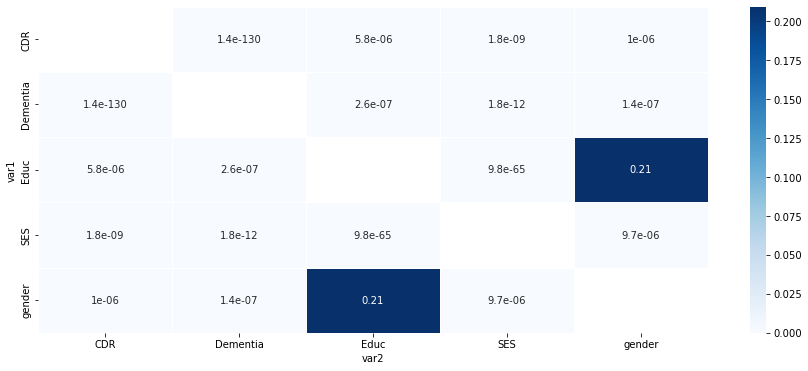

In [399]:

#Overall Correlation between categorical variables

df1 =('gender','Educ','SES','CDR','Dementia')
p_coeff = coeff_cat(Cross_Long,df1)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(p_coeff, annot=True, linewidths=.5, ax=ax,cmap='Blues')

- Dementia and CDR has correlation with all other features and togther( as expected).

- Educ&SES and gender&SES have strong correlation.   

<AxesSubplot:xlabel='var2', ylabel='var1'>

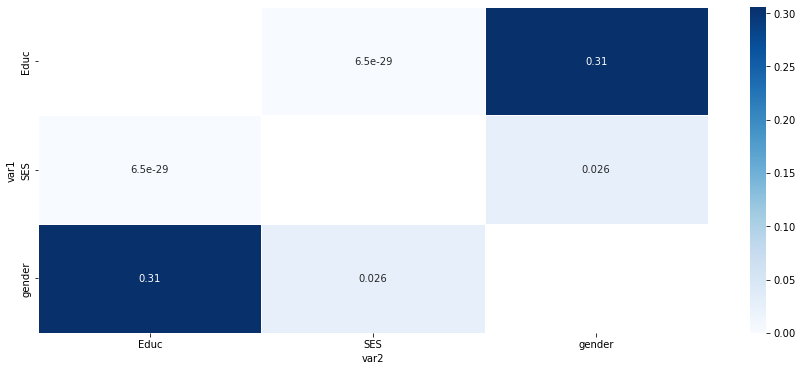

In [409]:

#Individual Correlation between categorical variables in no-Dementia

df1 =('gender','Educ','SES')
p_coeff_ND = coeff_cat(Cross_Long_ND,df1)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(p_coeff_ND, annot=True, linewidths=.5, ax=ax,cmap='Blues')

<AxesSubplot:xlabel='var2', ylabel='var1'>

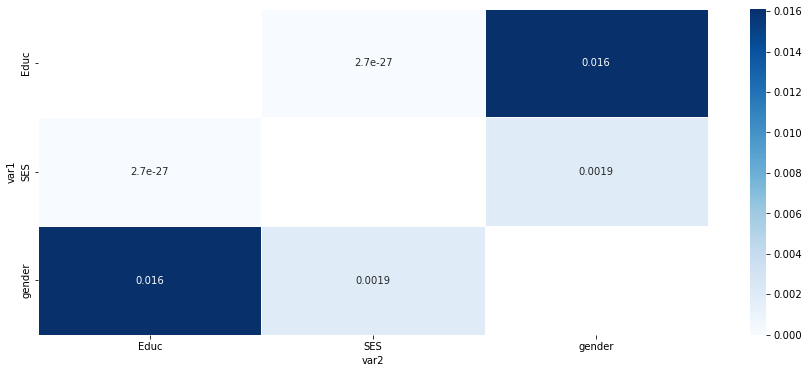

In [410]:

#Individual Correlation between categorical variables in Dementia

df1 =('gender','Educ','SES')
p_coeff_D = coeff_cat(Cross_Long_D,df1)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(p_coeff_D, annot=True, linewidths=.5, ax=ax,cmap='Blues')

- The correlation between gender and education is significant in Dementia group. 
- Educ&SES and gender&SES have strong correlation  in both group Dementia and no-Dementia 

# 3. Pre-processing and Training Data Development <a class="anchor" id="Process"></a>

## 3.1. Feature Engineering <a class="anchor" id="fEng"></a>

In [458]:
Process_data = Cross_Long.copy(deep=True)


Due to strong correlation of ASF with eTIV, I removed eTIV from features.ASF is an scaling factor.  The MRI ID Does not have any role in prediction, it is just a number. The Dementia was cretaed using CDR, therfore CDR was removed.   

In [459]:
#Removing CDR, MRI ID, and ASF
Process_data.drop(columns=['MRI ID','ASF','CDR'], inplace = True)

In [460]:
#Replacing M and F in gender with integer number 0 and 1
Process_data['gender']= Process_data['gender'].replace(['F','M'],[0,1])

In [461]:
Process_data.head(2)

,gender,Age,Educ,SES,MMSE,eTIV,nWBV,Dementia
0,1,87,3.0,2.0,27.0,1987,0.696,0
1,1,88,3.0,2.0,30.0,2004,0.681,0


In [462]:
Process_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 605
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    604 non-null    int64  
 1   Age       604 non-null    int64  
 2   Educ      604 non-null    float64
 3   SES       604 non-null    float64
 4   MMSE      604 non-null    float64
 5   eTIV      604 non-null    int64  
 6   nWBV      604 non-null    float64
 7   Dementia  604 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 58.6 KB


In [483]:
#splitting data to train and test sets 
X_train,X_test,y_train,y_test= train_test_split(Process_data.drop('Dementia',axis=1),Process_data['Dementia'],test_size=0.2,random_state=101)

## 3.2. Scaling features <a class="anchor" id="Scaling"></a>

In [484]:
ohe = OneHotEncoder()
sc = StandardScaler() 

In [485]:
X_train.head()

,gender,Age,Educ,SES,MMSE,eTIV,nWBV
322,1,76,2.0,2.5,27.0,1557,0.705
220,0,75,3.0,1.0,30.0,1419,0.731
120,0,81,2.0,2.0,30.0,1599,0.755
150,1,82,4.0,1.0,29.0,1692,0.723
267,0,79,3.0,1.0,29.0,1354,0.739


In [612]:
#Seperate datsets as three sets: Dementia (df1_train,df1_test, which has 0 and 1 only),
#the categorical value (df2_train,df2_test),the numrical values (df3_train,df3_test)
df1_train = X_train.iloc[:,[0]]
df2_train = X_train.iloc[:,[2,3]]
df3_train = X_train.iloc[:,[1,4,5,6]]

df1_test = X_test.iloc[:,[0]]
df2_test = X_test.iloc[:,[2,3]]
df3_test = X_test.iloc[:,[1,4,5,6]]


In [613]:
#Hot encoding the categorical features
df2_train_ho = pd.DataFrame(ohe.fit_transform(df2_train).toarray())
df2_train_ho.columns = ohe.get_feature_names_out(df2_train.columns)
df2_test_ho = pd.DataFrame(ohe.transform(df2_test).toarray())
df2_test_ho.columns= ohe.get_feature_names_out(df2_test.columns)

In [614]:
#Scaling the numerical features 
df3_train_sc = pd.DataFrame(sc.fit_transform(df3_train))
df3_train_sc.columns = df3_train.columns
df3_test_sc = pd.DataFrame(sc.transform(df3_test))
df3_test_sc.columns= df3_test.columns

In [615]:
#Scale the numerical features 
df_test_sc = pd.DataFrame(np.hstack([df1_test,df2_test]))
df_test_sc = pd.DataFrame(np.hstack([df_test_sc,df3_test_sc]))

df_train_sc = pd.DataFrame(np.hstack([df1_train,df2_train]))
df_train_sc = pd.DataFrame(np.hstack([df_train_sc,df3_train_sc]))


In [616]:
df_train_sc.columns = ['gender','Educ', 'SES','Age', 'MMSE', 'eTIV', 'nWBV']
df_test_sc.columns = ['gender','Educ', 'SES','Age', 'MMSE', 'eTIV', 'nWBV']

In [617]:
#Data are scaled only
df_train_sc.head()

,gender,Educ,SES,Age,MMSE,eTIV,nWBV
0,1.0,2.0,2.5,0.068641,-0.023903,0.538026,-0.748044
1,0.0,3.0,1.0,-0.033370,0.800738,-0.292161,-0.129289
2,0.0,2.0,2.0,0.578697,0.800738,0.790692,0.441869
3,1.0,4.0,1.0,0.680708,0.525858,1.350166,-0.319675
4,0.0,3.0,1.0,0.374674,0.525858,-0.683191,0.061097


In [620]:
#Scale the numerical features and hotencoding the categorical features 
df_test_scho = pd.DataFrame(np.hstack([df1_test,df2_test_ho]))
df_test_scho = pd.DataFrame(np.hstack([df_test_scho,df3_test_sc]))

df_train_scho = pd.DataFrame(np.hstack([df1_train,df2_train_ho]))
df_train_scho = pd.DataFrame(np.hstack([df_train_scho,df3_train_sc]))

In [624]:
df_train_scho.columns = ['gender','Educ_1.0', 'Educ_2.0', 'Educ_3.0', 'Educ_4.0', 'Educ_5.0', 'SES_1.0',
       'SES_2.0', 'SES_2.5', 'SES_3.0', 'SES_4.0', 'SES_5.0','Age', 'MMSE', 'eTIV', 'nWBV']
df_test_scho.columns = ['gender','Educ_1.0', 'Educ_2.0', 'Educ_3.0', 'Educ_4.0', 'Educ_5.0', 'SES_1.0',
       'SES_2.0', 'SES_2.5', 'SES_3.0', 'SES_4.0', 'SES_5.0','Age', 'MMSE', 'eTIV', 'nWBV']

In [625]:
#Data are scaled and hotencoded 
df_train_scho.head()

,gender,Educ_1.0,Educ_2.0,Educ_3.0,Educ_4.0,Educ_5.0,SES_1.0,SES_2.0,SES_2.5,SES_3.0,SES_4.0,SES_5.0,Age,MMSE,eTIV,nWBV
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.068641,-0.023903,0.538026,-0.748044
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.033370,0.800738,-0.292161,-0.129289
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.578697,0.800738,0.790692,0.441869
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.680708,0.525858,1.350166,-0.319675
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.374674,0.525858,-0.683191,0.061097


## 3.3. Machine learning algorithm <a class="anchor" id="algorithm"></a>

### 3.3.1. K-neighbor<a class="anchor" id="KNN"></a>

In [547]:
#Define the KNN model
knc = KNeighborsClassifier(n_neighbors = 5)
#Fit the scaled train data
knc.fit(df_train_sc, y_train)
# Predict the scaled test data
y_pred_knc = knc.predict(df_test_sc)

In [548]:
# print the accuracy of prediction on train and test data 
print('The Training Accuracy is: ', knc.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', knc.score(df_test_sc,y_test))

The Training Accuracy is:  0.9233954451345756
The Validation Accuracy is:  0.8016528925619835


In [549]:
# defining parameter range
param_grid = {'n_neighbors': [i for i in range(0,10)],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']} 
#creating grid search   
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3, cv = 5)
  
# fitting the model for grid search using the training sets with ross validation (cv =5)

grid.fit(df_train_sc, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .......algorithm=auto, n_neighbors=0;, score=nan total time=   0.0s
[CV 2/5] END .......algorithm=auto, n_neighbors=0;, score=nan total time=   0.0s
[CV 3/5] END .......algorithm=auto, n_neighbors=0;, score=nan total time=   0.0s
[CV 4/5] END .......algorithm=auto, n_neighbors=0;, score=nan total time=   0.0s
[CV 5/5] END .......algorithm=auto, n_neighbors=0;, score=nan total time=   0.0s
[CV 1/5] END .....algorithm=auto, n_neighbors=1;, score=0.918 total time=   0.0s
[CV 2/5] END .....algorithm=auto, n_neighbors=1;, score=0.825 total time=   0.0s
[CV 3/5] END .....algorithm=auto, n_neighbors=1;, score=0.856 total time=   0.0s
[CV 4/5] END .....algorithm=auto, n_neighbors=1;, score=0.844 total time=   0.0s
[CV 5/5] END .....algorithm=auto, n_neighbors=1;, score=0.865 total time=   0.0s
[CV 1/5] END .....algorithm=auto, n_neighbors=2;, score=0.856 total time=   0.0s
[CV 2/5] END .....algorithm=auto, n_neighbors=2

[CV 3/5] END ....algorithm=kd_tree, n_neighbors=0;, score=nan total time=   0.0s
[CV 4/5] END ....algorithm=kd_tree, n_neighbors=0;, score=nan total time=   0.0s
[CV 5/5] END ....algorithm=kd_tree, n_neighbors=0;, score=nan total time=   0.0s
[CV 1/5] END ..algorithm=kd_tree, n_neighbors=1;, score=0.918 total time=   0.0s
[CV 2/5] END ..algorithm=kd_tree, n_neighbors=1;, score=0.825 total time=   0.0s
[CV 3/5] END ..algorithm=kd_tree, n_neighbors=1;, score=0.856 total time=   0.0s
[CV 4/5] END ..algorithm=kd_tree, n_neighbors=1;, score=0.844 total time=   0.0s
[CV 5/5] END ..algorithm=kd_tree, n_neighbors=1;, score=0.865 total time=   0.0s
[CV 1/5] END ..algorithm=kd_tree, n_neighbors=2;, score=0.856 total time=   0.0s
[CV 2/5] END ..algorithm=kd_tree, n_neighbors=2;, score=0.825 total time=   0.0s
[CV 3/5] END ..algorithm=kd_tree, n_neighbors=2;, score=0.856 total time=   0.0s
[CV 4/5] END ..algorithm=kd_tree, n_neighbors=2;, score=0.854 total time=   0.0s
[CV 5/5] END ..algorithm=kd_

/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 569, in _fit
 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=3)

In [550]:
# print best parameter after tuning
print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 1}


In [551]:
# create Knc model with the optimum value for n_neighbors
knc = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto')
#fit the model using scaled train data 
knc.fit(df_train_sc, y_train)
# test the model on scaled test data 
y_pred_knc = knc.predict(df_test_sc)

#print the accuracy of prediction for test and train data 
print('The Training Accuracy is: ', knc.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', knc.score(df_test_sc,y_test))


The Training Accuracy is:  1.0
The Validation Accuracy is:  0.8842975206611571


In [657]:
# create a dictionary for accuracy of train and test data for comparing all model together 
knc_summary = {'model': ['KNeighborsClassifier'],'train_accuracy': [knc.score(df_train_sc, y_train)]\
               ,'test_accuracy':[knc.score(df_test_sc,y_test)]}
Accuracy_allmode= pd.DataFrame.from_dict(knc_summary)

In [658]:
Accuracy_allmode.head()

,model,train_accuracy,test_accuracy
0,KNeighborsClassifier,1.0,0.884298


### 3.3.2. Support vector machine<a class="SVM" id="KNN"></a>

In [554]:
#Create a svm Classifier
clf = svm.SVC() # Linear Kernel



#Train the model using the scaled  train data
clf.fit(df_train_sc, y_train)

#Predict the response for the scaled test data
y_pred_clf = clf.predict(df_test_sc)



In [555]:
#print the accuracy for train and test data 
print('The Training Accuracy is: ', clf.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', clf.score(df_test_sc,y_test))

The Training Accuracy is:  0.8530020703933747
The Validation Accuracy is:  0.8181818181818182


**Hyperparameter Tuning**

In [557]:
# Defining parameters range for grid search 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
#creating the model for grid search  
grid = GridSearchCV(svm.SVC(kernel = 'linear'), param_grid, refit = True, verbose = 3, cv = 5)
  
# fitting the model for grid search
grid.fit(df_train_sc, y_train)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.845 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.794 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.866 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.844 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.740 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.845 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.794 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.866 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.844 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.740 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.845 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.825 total time=   0.6s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.887 total time=   0.6s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.833 total time=   0.5s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.760 total time=   0.5s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.856 total time=   0.6s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.825 total time=   0.5s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.887 total time=   0.9s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.833 total time=   0.6s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.760 total time=   0.6s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.856 total time=   0.6s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.825 total time=   0.6s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.887 total time=   0.6s
[CV 4/5] END ...............

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [558]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 1, 'gamma': 1}


In [559]:
#Create a svm Classifier based on best parameters found from grid search
clf = svm.SVC(kernel='linear', C = 1, gamma = 1) 

#Train the model using scaled training sets
clf.fit(df_train_sc, y_train)

#Predict the response for scaled test dataset
y_pred_clf = clf.predict(df_test_sc)

In [560]:
#print the accuracy for train and test data 
print('The Training Accuracy is: ', clf.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', clf.score(df_test_sc,y_test))

The Training Accuracy is:  0.8385093167701864
The Validation Accuracy is:  0.8016528925619835


In [659]:
# create a dictionary for accuracy of train and test data for comparing all model together 
svm_summary = {'model': ['svm'],'train_accuracy': [clf.score(df_train_sc, y_train)]\
               ,'test_accuracy':[clf.score(df_test_sc,y_test)]}
Accuracy_allmode= pd.concat([pd.DataFrame.from_dict(svm_summary),Accuracy_allmode], axis =0)

In [660]:
Accuracy_allmode

,model,train_accuracy,test_accuracy
0,svm,0.838509,0.801653
0,KNeighborsClassifier,1.000000,0.884298


### 3.3.3. Logistic Regression<a class="SVM" id="LR"></a>

In [563]:
#create the model for LogisticRegression
lr = LogisticRegression()
# fit the data on scaled train data 
lr.fit(df_train_sc, y_train)
# fit the data on scaled test data 
y_pred_lr = lr.predict(df_test_sc)

In [564]:
print('The Training Accuracy is: ', lr.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', lr.score(df_test_sc,y_test))

The Training Accuracy is:  0.8385093167701864
The Validation Accuracy is:  0.7768595041322314


**Hyperparameter Tuning**

In [565]:
# defining parameter range for grid search
param_grid = {'C': [0.05,0.1,0.2, 0.5, 1], 
              'max_iter': [100, 200],
              'penalty': ['l1', 'l2', 'elasticnet']} 

# Define the model with grid search 
  
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3, cv = 5)
  
# fitting the model for grid search
grid.fit(df_train_sc, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ....C=0.05, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.05, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.05, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.05, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.05, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ..C=0.05, max_iter=100, penalty=l2;, score=0.835 total time=   0.0s
[CV 2/5] END ..C=0.05, max_iter=100, penalty=l2;, score=0.835 total time=   0.0s
[CV 3/5] END ..C=0.05, max_iter=100, penalty=l2;, score=0.866 total time=   0.0s
[CV 4/5] END ..C=0.05, max_iter=100, penalty=l2;, score=0.823 total time=   0.0s
[CV 5/5] END ..C=0.05, max_iter=100, penalty=l2;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.05, max_iter=100, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END C=0.05, max_iter=100, penalty=

[CV 3/5] END ...C=0.5, max_iter=200, penalty=l2;, score=0.876 total time=   0.0s
[CV 4/5] END ...C=0.5, max_iter=200, penalty=l2;, score=0.833 total time=   0.0s
[CV 5/5] END ...C=0.5, max_iter=200, penalty=l2;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=200, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=200, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=200, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=200, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=200, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END 

/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/lin

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 0.2, 0.5, 1], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=3)

In [566]:
# print best parameter after tuning
print(grid.best_params_)  

{'C': 0.2, 'max_iter': 100, 'penalty': 'l2'}


In [583]:
# Define and fit, and pridct the logistic regression model for optimum parameters found from grid search
lr = LogisticRegression(C = 0.2, max_iter =100, penalty = 'l2')
lr.fit(df_train_sc, y_train)
y_pred_lr = lr.predict(df_test_sc)

In [584]:
#print the accuracy for train and test data 
print('The Training Accuracy is: ', lr.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', lr.score(df_test_sc,y_test))

The Training Accuracy is:  0.8385093167701864
The Validation Accuracy is:  0.7933884297520661


In [661]:
# create a dictionary for accuracy of train and test data for comparing all model together 
lr_summary = {'model': ['LogisticRegression'],'train_accuracy': [lr.score(df_train_sc, y_train)]\
               ,'test_accuracy':[lr.score(df_test_sc,y_test)]}
Accuracy_allmode= pd.concat([pd.DataFrame.from_dict(lr_summary),Accuracy_allmode], axis =0)

In [662]:
Accuracy_allmode

,model,train_accuracy,test_accuracy
0,LogisticRegression,0.838509,0.793388
0,svm,0.838509,0.801653
0,KNeighborsClassifier,1.000000,0.884298


### 3.3.4. Decision tree<a class="SVM" id="tree"></a>

In [571]:
#Define the Decision tree model 
Dtree = DecisionTreeClassifier(random_state=42)
#  Decision Tree Classifier using train data (noscaling and hotencoding are needed)
Dtree.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_Dtree = Dtree.predict(X_test)

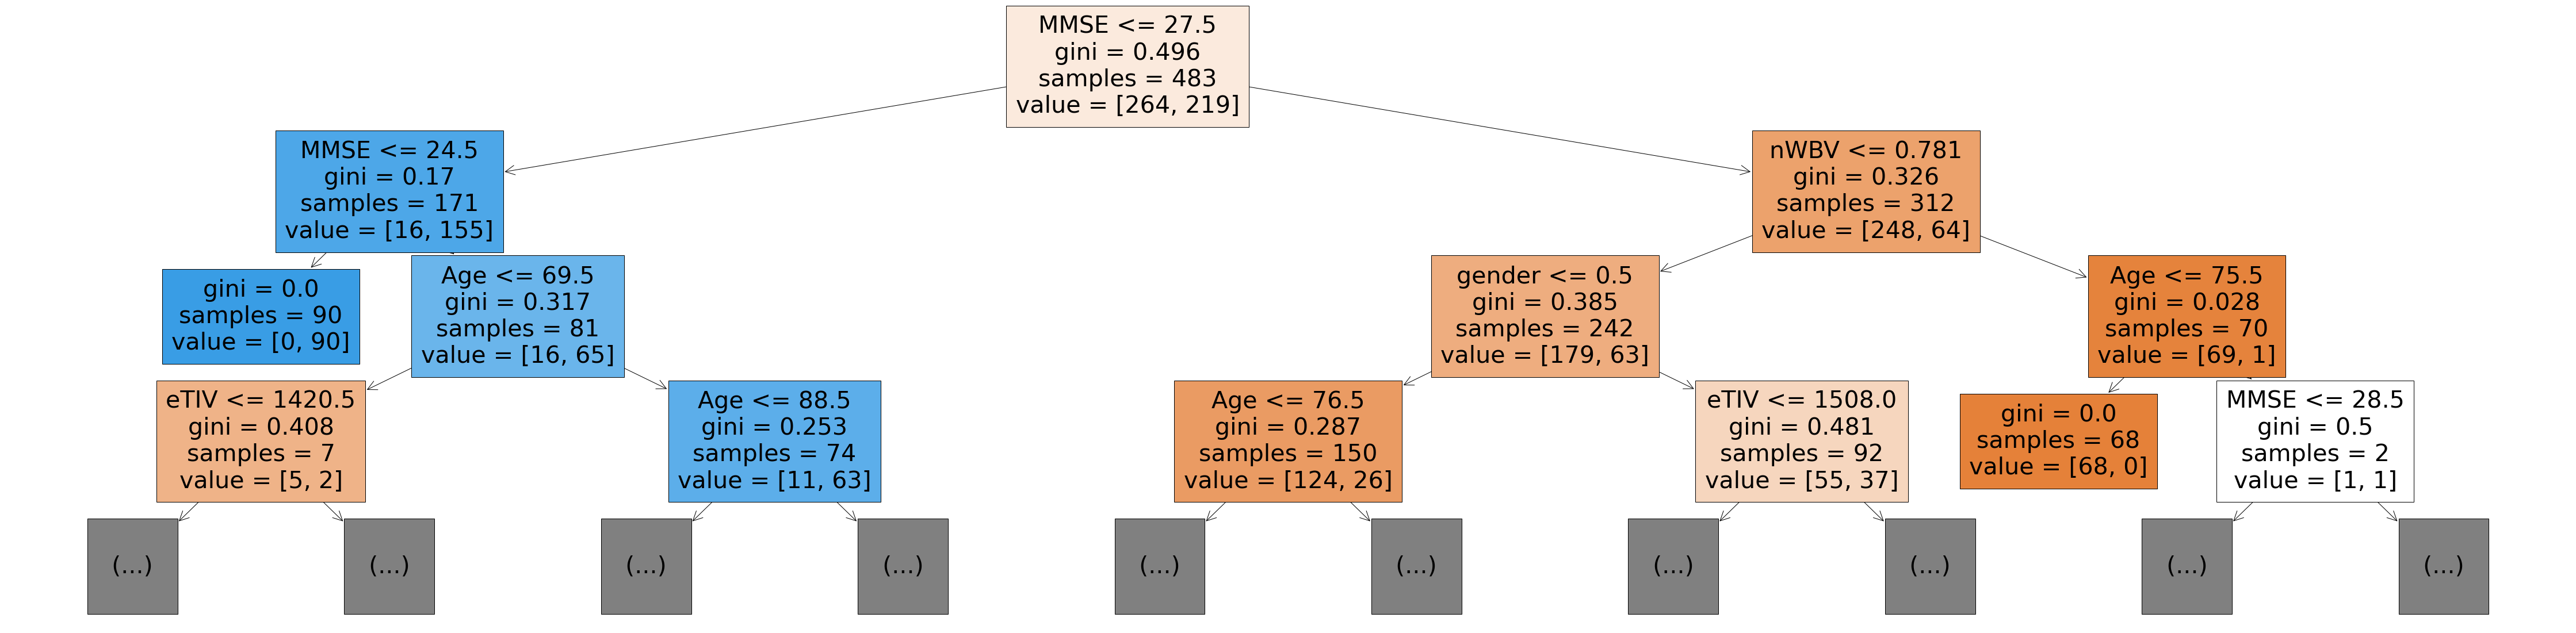

In [572]:
#plot the tree 
plt.figure(figsize =(80,20))

plot_tree(Dtree, feature_names=X_train.columns, max_depth=3, filled=True);

In [573]:
#print the accuracy for test and train data 
print('The Training Accuracy is: ', Dtree.score(X_train, y_train))
print('The Validation Accuracy is: ', Dtree.score(X_test,y_test))

The Training Accuracy is:  1.0
The Validation Accuracy is:  0.8181818181818182


**Hyperparameter tuning**

In [574]:
# defining parameters range for grid search 
param_grid = {'criterion': ['gini','entropy'], 
              'max_leaf_nodes': [5, 10, 20, 30],
              'max_depth': [i for i in range(1,15)]} 
 #define the model for grid search  
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, refit = True, verbose = 3, cv =5)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.876 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.804 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.845 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.875 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.876 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.804 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.845 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.875 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.771 total time=   0.0s
[CV 1/5] END

[CV 2/5] END criterion=gini, max_depth=6, max_leaf_nodes=20;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_leaf_nodes=20;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_leaf_nodes=20;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_leaf_nodes=20;, score=0.729 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_leaf_nodes=30;, score=0.866 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_leaf_nodes=30;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_leaf_nodes=30;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_leaf_nodes=30;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_leaf_nodes=30;, score=0.719 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_leaf_nodes=5;, score=0.876 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_leaf_nodes=5;, score=0.80

[CV 2/5] END criterion=gini, max_depth=11, max_leaf_nodes=10;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_leaf_nodes=10;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_leaf_nodes=10;, score=0.865 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_leaf_nodes=10;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_leaf_nodes=20;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_leaf_nodes=20;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_leaf_nodes=20;, score=0.876 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_leaf_nodes=20;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_leaf_nodes=20;, score=0.729 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_leaf_nodes=30;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_leaf_nodes=30

[CV 5/5] END criterion=entropy, max_depth=1, max_leaf_nodes=30;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_leaf_nodes=5;, score=0.876 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_leaf_nodes=5;, score=0.804 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_leaf_nodes=5;, score=0.845 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_leaf_nodes=5;, score=0.875 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_leaf_nodes=5;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_leaf_nodes=10;, score=0.876 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_leaf_nodes=10;, score=0.804 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_leaf_nodes=10;, score=0.845 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_leaf_nodes=10;, score=0.875 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, 

[CV 1/5] END criterion=entropy, max_depth=6, max_leaf_nodes=30;, score=0.887 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_leaf_nodes=30;, score=0.773 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_leaf_nodes=30;, score=0.845 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_leaf_nodes=30;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_leaf_nodes=30;, score=0.781 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_leaf_nodes=5;, score=0.876 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_leaf_nodes=5;, score=0.804 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_leaf_nodes=5;, score=0.845 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_leaf_nodes=5;, score=0.875 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_leaf_nodes=5;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, 

[CV 5/5] END criterion=entropy, max_depth=11, max_leaf_nodes=20;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_leaf_nodes=30;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_leaf_nodes=30;, score=0.784 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_leaf_nodes=30;, score=0.856 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_leaf_nodes=30;, score=0.802 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_leaf_nodes=30;, score=0.792 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_leaf_nodes=5;, score=0.876 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_leaf_nodes=5;, score=0.804 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_leaf_nodes=5;, score=0.845 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_leaf_nodes=5;, score=0.875 total time=   0.0s
[CV 5/5] END criterion=entropy, ma

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'max_leaf_nodes': [5, 10, 20, 30]},
             verbose=3)

In [575]:
# print best parameter after tuning
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 10}


In [592]:
#create the model with best parameters found from grid search CV 
Dtree = DecisionTreeClassifier(random_state=42,criterion = 'entropy',max_depth=5, max_leaf_nodes =10)
# Train Decision Tree Classifier
Dtree.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_Dtree = Dtree.predict(X_test)

In [593]:
print('The Training Accuracy for max_depth is: ', Dtree.score(X_train, y_train))
print('The Validation Accuracy for max_depth is:', Dtree.score(X_test,y_test))


The Training Accuracy for max_depth is:  0.8405797101449275
The Validation Accuracy for max_depth is: 0.8099173553719008


In [663]:
# create a dictionary for accuracy of train and test data for comparing all model together 
Dtree_summary = {'model': ['DecisionTreeClassifier'],'train_accuracy': [Dtree.score(X_train, y_train)]\
               ,'test_accuracy':[Dtree.score(X_test,y_test)]}
Accuracy_allmode= pd.concat([pd.DataFrame.from_dict(Dtree_summary),Accuracy_allmode], axis =0)

In [664]:
Accuracy_allmode

,model,train_accuracy,test_accuracy
0,DecisionTreeClassifier,0.840580,0.809917
0,LogisticRegression,0.838509,0.793388
0,svm,0.838509,0.801653
0,KNeighborsClassifier,1.000000,0.884298


### 3.3.5. Random forest<a class="RF" id="RF"></a>

In [596]:
#creating the Random forest
RF = RandomForestClassifier(random_state = 24, n_jobs = -1)
#fit the model on the train data (no scaling and hotencoding needed)
RF.fit(X_train, y_train)
#predict the model for test data 
y_pred_RF = RF.predict(X_test)

In [597]:
#print the accuracy of test and train data 
print('The Training Accuracy is: ', RF.score(X_train, y_train))
print('The Validation Accuracy is: ', RF.score(X_test,y_test))

The Training Accuracy is:  1.0
The Validation Accuracy is:  0.8181818181818182


In [598]:
# Define parameter range for grid search 
param_grid = {'n_estimators': [100,200,300], 
              'max_features': ['log2','sqrt','auto'],
              'min_samples_split': [2,4,6,8,10],
              'max_depth': [5,10,15]} 
# Define the  model for grid search
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, refit = True, verbose = 3,cv= 5)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.907 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.856 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.866 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.854 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.812 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.897 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.845 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.866 total time=   0.3s
[CV 4/5] 

[CV 1/5] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=300;, score=0.897 total time=   0.7s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=300;, score=0.835 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=300;, score=0.866 total time=   0.6s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=300;, score=0.854 total time=   0.6s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=300;, score=0.792 total time=   0.6s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.907 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.856 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.866 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_split=2, n

[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.835 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.866 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.844 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.792 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=300;, score=0.897 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=300;, score=0.835 total time=   0.6s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=300;, score=0.866 total time=   0.5s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=300;, score=0.854 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_split=1

[CV 3/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=100;, score=0.866 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=100;, score=0.865 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=100;, score=0.812 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200;, score=0.897 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200;, score=0.835 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200;, score=0.866 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200;, score=0.844 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200;, score=0.792 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_split=1

[CV 4/5] END max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.854 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.823 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.918 total time=   0.2s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.845 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.866 total time=   0.2s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.844 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.823 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=200;, score=0.907 total time=   0.4s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_

[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.854 total time=   0.3s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.823 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.907 total time=   0.5s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.845 total time=   0.5s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.866 total time=   0.5s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.854 total time=   0.5s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.823 total time=   0.5s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.918 total time=   0.2s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_split

[CV 4/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.854 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.823 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.918 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.845 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.866 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.854 total time=   0.3s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.823 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.907 total time=   0.5s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_split=

[CV 4/5] END max_depth=15, max_features=log2, min_samples_split=6, n_estimators=300;, score=0.854 total time=   0.5s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_split=6, n_estimators=300;, score=0.823 total time=   0.5s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.918 total time=   0.3s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.856 total time=   0.2s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.866 total time=   0.2s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.854 total time=   0.2s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.823 total time=   0.2s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.918 total time=   0.6s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_split=

[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_split=6, n_estimators=200;, score=0.844 total time=   0.3s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_split=6, n_estimators=200;, score=0.823 total time=   0.3s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_split=6, n_estimators=300;, score=0.907 total time=   0.5s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_split=6, n_estimators=300;, score=0.845 total time=   0.5s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_split=6, n_estimators=300;, score=0.876 total time=   0.5s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_split=6, n_estimators=300;, score=0.854 total time=   0.5s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_split=6, n_estimators=300;, score=0.823 total time=   0.5s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.918 total time=   0.2s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_split=

[CV 4/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=100;, score=0.844 total time=   0.2s
[CV 5/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=100;, score=0.812 total time=   0.2s
[CV 1/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=200;, score=0.907 total time=   0.3s
[CV 2/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=200;, score=0.866 total time=   0.3s
[CV 3/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=200;, score=0.876 total time=   0.3s
[CV 4/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=200;, score=0.844 total time=   0.3s
[CV 5/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=200;, score=0.823 total time=   0.3s
[CV 1/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=300;, score=0.907 total time=   0.5s
[CV 2/5] END max_depth=15, max_features=auto, min_samples_split=

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [599]:
# print best parameter after tuning
print(grid.best_params_)

{'max_depth': 15, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 300}


In [600]:
#Define the random forest model with best parameters found from grid search
RF = RandomForestClassifier(max_depth =15, max_features = 'log2', min_samples_split =2, n_estimators=300, random_state = 24, n_jobs = -1)
#fit the model on train data 
RF.fit(X_train, y_train)
#predict the model for test data 
y_pred_RF = RF.predict(X_test)

In [601]:
print('The Training Accuracy is: ', RF.score(X_train, y_train))
print('The Validation Accuracy is: ', RF.score(X_test,y_test))

The Training Accuracy is:  1.0
The Validation Accuracy is:  0.8181818181818182


In [665]:
# create a dictionary for accuracy of train and test data for comparing all model together 
RF_summary = {'model': ['RandomForestClassifier'],'train_accuracy': [RF.score(X_train, y_train)]\
               ,'test_accuracy':[RF.score(X_test,y_test)]}
Accuracy_allmode= pd.concat([pd.DataFrame.from_dict(RF_summary),Accuracy_allmode], axis =0)

In [666]:
Accuracy_allmode

,model,train_accuracy,test_accuracy
0,RandomForestClassifier,1.000000,0.818182
0,DecisionTreeClassifier,0.840580,0.809917
0,LogisticRegression,0.838509,0.793388
0,svm,0.838509,0.801653
0,KNeighborsClassifier,1.000000,0.884298


### 3.3.6 Convolutional Neural Network<a class="NN" id="CNN"></a>

In [627]:
#Define cnn model using keras
def cnn_model():
    model = Sequential()
    model.add(Dense(512,activation='relu',input_shape=(16,)))
    model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation = 'sigmoid'))
    return model
#create the cnn model 
model = cnn_model()
# compile model
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
#summary of model 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               8704      
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [628]:
#Define the call back for EarlyStopping 
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.001,
    patience=100,
    mode='auto')

In [629]:
# It is recoemnded to do  hotencoding the categorical data and scaling numerical data for cnn model
# so I used the df_train_scho for train and df_test_scho for test data

#fit the data for a range of epoches and using the scaled and hotencoded train data. 
history = model.fit(df_train_scho,y_train,epochs=300,batch_size=10000,validation_split=0.10,callbacks=cb)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.7183 - accuracy: 0.4677 - val_loss: 0.7018 - val_accuracy: 0.3878
Epoch 2/300
1/1 [==============================] - 0s 70ms/step - loss: 0.6970 - accuracy: 0.5553 - val_loss: 0.6987 - val_accuracy: 0.4286
Epoch 3/300
1/1 [==============================] - 0s 92ms/step - loss: 0.6860 - accuracy: 0.5599 - val_loss: 0.6956 - val_accuracy: 0.4490
Epoch 4/300
1/1 [==============================] - 0s 76ms/step - loss: 0.6962 - accuracy: 0.5276 - val_loss: 0.6925 - val_accuracy: 0.5102
Epoch 5/300
1/1 [==============================] - 0s 67ms/step - loss: 0.6893 - accuracy: 0.5369 - val_loss: 0.6895 - val_accuracy: 0.5102
Epoch 6/300
1/1 [==============================] - 0s 66ms/step - loss: 0.6854 - accuracy: 0.5599 - val_loss: 0.6866 - val_accuracy: 0.5306
Epoch 7/300
1/1 [==============================] - 0s 61ms/step - loss: 0.6698 - accuracy: 0.5968 - val_loss: 0.6837 - val_accuracy: 0.5510
Epoch 8/300
1/1 [=====

1/1 [==============================] - 0s 39ms/step - loss: 0.4868 - accuracy: 0.8134 - val_loss: 0.5557 - val_accuracy: 0.6735
Epoch 60/300
1/1 [==============================] - 0s 40ms/step - loss: 0.4860 - accuracy: 0.8203 - val_loss: 0.5538 - val_accuracy: 0.6735
Epoch 61/300
1/1 [==============================] - 0s 53ms/step - loss: 0.4819 - accuracy: 0.8065 - val_loss: 0.5519 - val_accuracy: 0.6735
Epoch 62/300
1/1 [==============================] - 0s 50ms/step - loss: 0.4835 - accuracy: 0.8203 - val_loss: 0.5501 - val_accuracy: 0.6735
Epoch 63/300
1/1 [==============================] - 0s 37ms/step - loss: 0.4767 - accuracy: 0.8088 - val_loss: 0.5484 - val_accuracy: 0.6939
Epoch 64/300
1/1 [==============================] - 0s 79ms/step - loss: 0.4806 - accuracy: 0.7811 - val_loss: 0.5468 - val_accuracy: 0.6939
Epoch 65/300
1/1 [==============================] - 0s 55ms/step - loss: 0.4789 - accuracy: 0.8157 - val_loss: 0.5452 - val_accuracy: 0.6939
Epoch 66/300
1/1 [========

1/1 [==============================] - 0s 63ms/step - loss: 0.3625 - accuracy: 0.8571 - val_loss: 0.5232 - val_accuracy: 0.7347
Epoch 118/300
1/1 [==============================] - 0s 100ms/step - loss: 0.3567 - accuracy: 0.8525 - val_loss: 0.5232 - val_accuracy: 0.7347
Epoch 119/300
1/1 [==============================] - 0s 88ms/step - loss: 0.3572 - accuracy: 0.8433 - val_loss: 0.5233 - val_accuracy: 0.7347
Epoch 120/300
1/1 [==============================] - 0s 67ms/step - loss: 0.3690 - accuracy: 0.8364 - val_loss: 0.5236 - val_accuracy: 0.7347
Epoch 121/300
1/1 [==============================] - 0s 95ms/step - loss: 0.3556 - accuracy: 0.8387 - val_loss: 0.5238 - val_accuracy: 0.7347
Epoch 122/300
1/1 [==============================] - 0s 70ms/step - loss: 0.3618 - accuracy: 0.8548 - val_loss: 0.5240 - val_accuracy: 0.7347
Epoch 123/300
1/1 [==============================] - 0s 75ms/step - loss: 0.3434 - accuracy: 0.8710 - val_loss: 0.5243 - val_accuracy: 0.7347
Epoch 124/300
1/1 [

Epoch 175/300
1/1 [==============================] - 0s 51ms/step - loss: 0.3145 - accuracy: 0.8756 - val_loss: 0.5508 - val_accuracy: 0.7143
Epoch 176/300
1/1 [==============================] - 0s 62ms/step - loss: 0.3029 - accuracy: 0.8756 - val_loss: 0.5517 - val_accuracy: 0.7143
Epoch 177/300
1/1 [==============================] - 0s 62ms/step - loss: 0.3007 - accuracy: 0.8525 - val_loss: 0.5523 - val_accuracy: 0.7143
Epoch 178/300
1/1 [==============================] - 0s 42ms/step - loss: 0.3083 - accuracy: 0.8618 - val_loss: 0.5529 - val_accuracy: 0.7143
Epoch 179/300
1/1 [==============================] - 0s 61ms/step - loss: 0.2823 - accuracy: 0.8756 - val_loss: 0.5529 - val_accuracy: 0.7143
Epoch 180/300
1/1 [==============================] - 0s 43ms/step - loss: 0.3042 - accuracy: 0.8664 - val_loss: 0.5529 - val_accuracy: 0.7143
Epoch 181/300
1/1 [==============================] - 0s 38ms/step - loss: 0.2895 - accuracy: 0.8802 - val_loss: 0.5531 - val_accuracy: 0.7143
Epoch 

Epoch 233/300
1/1 [==============================] - 0s 38ms/step - loss: 0.2702 - accuracy: 0.8894 - val_loss: 0.5755 - val_accuracy: 0.7347
Epoch 234/300
1/1 [==============================] - 0s 36ms/step - loss: 0.2767 - accuracy: 0.8687 - val_loss: 0.5756 - val_accuracy: 0.7347
Epoch 235/300
1/1 [==============================] - 0s 39ms/step - loss: 0.2934 - accuracy: 0.8687 - val_loss: 0.5752 - val_accuracy: 0.7347
Epoch 236/300
1/1 [==============================] - 0s 43ms/step - loss: 0.2938 - accuracy: 0.8641 - val_loss: 0.5754 - val_accuracy: 0.7347
Epoch 237/300
1/1 [==============================] - 0s 46ms/step - loss: 0.2559 - accuracy: 0.8779 - val_loss: 0.5759 - val_accuracy: 0.7347
Epoch 238/300
1/1 [==============================] - 0s 90ms/step - loss: 0.2898 - accuracy: 0.8733 - val_loss: 0.5760 - val_accuracy: 0.7347
Epoch 239/300
1/1 [==============================] - 0s 67ms/step - loss: 0.2858 - accuracy: 0.8756 - val_loss: 0.5756 - val_accuracy: 0.7347
Epoch 

Epoch 291/300
1/1 [==============================] - 0s 50ms/step - loss: 0.2574 - accuracy: 0.8802 - val_loss: 0.5955 - val_accuracy: 0.7347
Epoch 292/300
1/1 [==============================] - 0s 84ms/step - loss: 0.2639 - accuracy: 0.8940 - val_loss: 0.5961 - val_accuracy: 0.7347
Epoch 293/300
1/1 [==============================] - 0s 47ms/step - loss: 0.2601 - accuracy: 0.8894 - val_loss: 0.5964 - val_accuracy: 0.7347
Epoch 294/300
1/1 [==============================] - 0s 38ms/step - loss: 0.2569 - accuracy: 0.8779 - val_loss: 0.5966 - val_accuracy: 0.7347
Epoch 295/300
1/1 [==============================] - 0s 47ms/step - loss: 0.2734 - accuracy: 0.8825 - val_loss: 0.5961 - val_accuracy: 0.7347
Epoch 296/300
1/1 [==============================] - 0s 66ms/step - loss: 0.2646 - accuracy: 0.8871 - val_loss: 0.5956 - val_accuracy: 0.7347
Epoch 297/300
1/1 [==============================] - 0s 71ms/step - loss: 0.2602 - accuracy: 0.8848 - val_loss: 0.5946 - val_accuracy: 0.7347
Epoch 

Train: 0.899, Test: 0.777


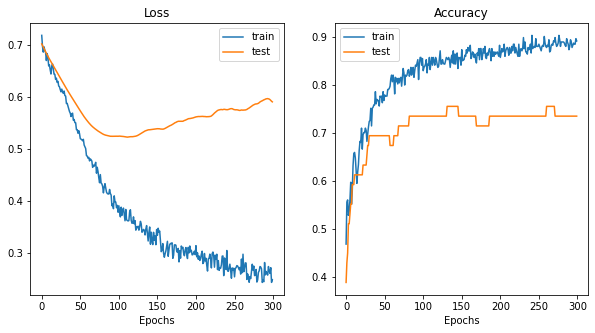

<Figure size 432x288 with 0 Axes>

In [630]:
# evaluate the model based on accuracy and loss 
_, train_acc = model.evaluate(df_train_scho, y_train, verbose=0)
_, test_acc = model.evaluate(df_test_scho, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.legend()
# plot accuracy during training
plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epochs')
plt.legend()
plt.show()
plt.tight_layout()

In [650]:
# compile cnn model
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
#fit the model for the best epochs = 100 
history = model.fit(df_train_scho,y_train,epochs=100,batch_size=10000,validation_split=0.10)

Epoch 1/100
1/1 [==============================] - 1s 847ms/step - loss: 0.2329 - accuracy: 0.9147 - val_loss: 0.6179 - val_accuracy: 0.7551
Epoch 2/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2327 - accuracy: 0.9078 - val_loss: 0.6210 - val_accuracy: 0.7551
Epoch 3/100
1/1 [==============================] - 0s 54ms/step - loss: 0.2310 - accuracy: 0.9101 - val_loss: 0.6231 - val_accuracy: 0.7551
Epoch 4/100
1/1 [==============================] - 0s 95ms/step - loss: 0.2733 - accuracy: 0.8871 - val_loss: 0.6239 - val_accuracy: 0.7551
Epoch 5/100
1/1 [==============================] - 0s 62ms/step - loss: 0.2321 - accuracy: 0.8894 - val_loss: 0.6253 - val_accuracy: 0.7551
Epoch 6/100
1/1 [==============================] - 0s 59ms/step - loss: 0.2372 - accuracy: 0.8894 - val_loss: 0.6262 - val_accuracy: 0.7551
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 0.2407 - accuracy: 0.9009 - val_loss: 0.6262 - val_accuracy: 0.7551
Epoch 8/100
1/1 [==

1/1 [==============================] - 0s 47ms/step - loss: 0.2261 - accuracy: 0.9055 - val_loss: 0.6274 - val_accuracy: 0.7551
Epoch 60/100
1/1 [==============================] - 0s 54ms/step - loss: 0.2080 - accuracy: 0.9124 - val_loss: 0.6283 - val_accuracy: 0.7551
Epoch 61/100
1/1 [==============================] - 0s 126ms/step - loss: 0.2160 - accuracy: 0.8963 - val_loss: 0.6295 - val_accuracy: 0.7551
Epoch 62/100
1/1 [==============================] - 0s 86ms/step - loss: 0.2228 - accuracy: 0.9078 - val_loss: 0.6310 - val_accuracy: 0.7551
Epoch 63/100
1/1 [==============================] - 0s 91ms/step - loss: 0.2045 - accuracy: 0.9124 - val_loss: 0.6326 - val_accuracy: 0.7551
Epoch 64/100
1/1 [==============================] - 0s 104ms/step - loss: 0.2220 - accuracy: 0.8986 - val_loss: 0.6345 - val_accuracy: 0.7551
Epoch 65/100
1/1 [==============================] - 0s 52ms/step - loss: 0.2281 - accuracy: 0.9032 - val_loss: 0.6372 - val_accuracy: 0.7551
Epoch 66/100
1/1 [======

In [651]:
scores_tr = model.evaluate(df_train_scho, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores_tr[1]*100))

accuracy: 91.72%


In [652]:
scores_te = model.evaluate(df_test_scho, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores_te[1]*100))

accuracy: 77.69%


In [667]:
# create a dictionary for accuracy of train and test data for comparing all model together 
cnn_summary = {'model': ['CNN'],'train_accuracy': [scores_tr[1]]\
               ,'test_accuracy':[scores_te[1]]}
Accuracy_allmode= pd.concat([pd.DataFrame.from_dict(cnn_summary),Accuracy_allmode], axis =0)

### 3.3.7 Gradient Boosting<a class="NN" id="GB"></a>

In [689]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred = GBC.predict(X_test)

In [690]:
#print the accuracy for test and train data 
print('The Training Accuracy is: ', GBC.score(X_train, y_train))
print('The Validation Accuracy is: ', GBC.score(X_test,y_test))

The Training Accuracy is:  0.968944099378882
The Validation Accuracy is:  0.7933884297520661


**Hyperparameter tuning**

In [678]:
# Define parameter range for grid search 
param_grid = {'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1,1.25,1.5,1.75,2], 
              'max_features': [2,3,4,5],
              'max_depth': ['auto', 'sqrt', 'log2'],
              'max_depth': [5,10,15],
              'n_estimators': [100,200,300]} 
# Define the  model for grid search
grid = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, refit = True, verbose = 3,cv= 5)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=2, n_estimators=100;, score=0.887 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=2, n_estimators=100;, score=0.856 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=2, n_estimators=100;, score=0.876 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=2, n_estimators=100;, score=0.875 total time=   0.2s
[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=2, n_estimators=100;, score=0.833 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=2, n_estimators=200;, score=0.887 total time=   0.3s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=2, n_estimators=200;, score=0.856 total time=   0.5s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=2, n_estimators=200;, score=0.918 total time=   0.4s
[CV 4/5] END learning_rate=0.05, max_dep

[CV 4/5] END learning_rate=0.05, max_depth=10, max_features=2, n_estimators=300;, score=0.875 total time=   2.2s
[CV 5/5] END learning_rate=0.05, max_depth=10, max_features=2, n_estimators=300;, score=0.823 total time=   3.0s
[CV 1/5] END learning_rate=0.05, max_depth=10, max_features=3, n_estimators=100;, score=0.887 total time=   0.7s
[CV 2/5] END learning_rate=0.05, max_depth=10, max_features=3, n_estimators=100;, score=0.845 total time=   1.0s
[CV 3/5] END learning_rate=0.05, max_depth=10, max_features=3, n_estimators=100;, score=0.918 total time=   0.7s
[CV 4/5] END learning_rate=0.05, max_depth=10, max_features=3, n_estimators=100;, score=0.865 total time=   0.7s
[CV 5/5] END learning_rate=0.05, max_depth=10, max_features=3, n_estimators=100;, score=0.833 total time=   0.7s
[CV 1/5] END learning_rate=0.05, max_depth=10, max_features=3, n_estimators=200;, score=0.887 total time=   1.5s
[CV 2/5] END learning_rate=0.05, max_depth=10, max_features=3, n_estimators=200;, score=0.856 to

[CV 2/5] END learning_rate=0.05, max_depth=15, max_features=3, n_estimators=300;, score=0.835 total time=   1.0s
[CV 3/5] END learning_rate=0.05, max_depth=15, max_features=3, n_estimators=300;, score=0.918 total time=   1.3s
[CV 4/5] END learning_rate=0.05, max_depth=15, max_features=3, n_estimators=300;, score=0.865 total time=   1.1s
[CV 5/5] END learning_rate=0.05, max_depth=15, max_features=3, n_estimators=300;, score=0.823 total time=   0.8s
[CV 1/5] END learning_rate=0.05, max_depth=15, max_features=4, n_estimators=100;, score=0.876 total time=   0.3s
[CV 2/5] END learning_rate=0.05, max_depth=15, max_features=4, n_estimators=100;, score=0.825 total time=   0.3s
[CV 3/5] END learning_rate=0.05, max_depth=15, max_features=4, n_estimators=100;, score=0.907 total time=   0.3s
[CV 4/5] END learning_rate=0.05, max_depth=15, max_features=4, n_estimators=100;, score=0.865 total time=   0.3s
[CV 5/5] END learning_rate=0.05, max_depth=15, max_features=4, n_estimators=100;, score=0.812 to

[CV 1/5] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=300;, score=0.897 total time=   0.6s
[CV 2/5] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=300;, score=0.845 total time=   0.5s
[CV 3/5] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=300;, score=0.928 total time=   0.5s
[CV 4/5] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=300;, score=0.865 total time=   0.5s
[CV 5/5] END learning_rate=0.1, max_depth=5, max_features=4, n_estimators=300;, score=0.844 total time=   0.5s
[CV 1/5] END learning_rate=0.1, max_depth=5, max_features=5, n_estimators=100;, score=0.887 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=5, max_features=5, n_estimators=100;, score=0.825 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=5, max_features=5, n_estimators=100;, score=0.928 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=5, max_features=5, n_estimators=100;, score=0.833 total time=   0.2s
[

[CV 5/5] END learning_rate=0.1, max_depth=10, max_features=5, n_estimators=200;, score=0.802 total time=   0.9s
[CV 1/5] END learning_rate=0.1, max_depth=10, max_features=5, n_estimators=300;, score=0.887 total time=   1.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, max_features=5, n_estimators=300;, score=0.804 total time=   1.0s
[CV 3/5] END learning_rate=0.1, max_depth=10, max_features=5, n_estimators=300;, score=0.866 total time=   1.2s
[CV 4/5] END learning_rate=0.1, max_depth=10, max_features=5, n_estimators=300;, score=0.865 total time=   1.1s
[CV 5/5] END learning_rate=0.1, max_depth=10, max_features=5, n_estimators=300;, score=0.802 total time=   1.0s
[CV 1/5] END learning_rate=0.1, max_depth=15, max_features=2, n_estimators=100;, score=0.907 total time=   0.4s
[CV 2/5] END learning_rate=0.1, max_depth=15, max_features=2, n_estimators=100;, score=0.876 total time=   0.4s
[CV 3/5] END learning_rate=0.1, max_depth=15, max_features=2, n_estimators=100;, score=0.887 total time=

[CV 4/5] END learning_rate=0.25, max_depth=5, max_features=2, n_estimators=200;, score=0.865 total time=   0.3s
[CV 5/5] END learning_rate=0.25, max_depth=5, max_features=2, n_estimators=200;, score=0.812 total time=   0.3s
[CV 1/5] END learning_rate=0.25, max_depth=5, max_features=2, n_estimators=300;, score=0.897 total time=   0.4s
[CV 2/5] END learning_rate=0.25, max_depth=5, max_features=2, n_estimators=300;, score=0.856 total time=   0.4s
[CV 3/5] END learning_rate=0.25, max_depth=5, max_features=2, n_estimators=300;, score=0.918 total time=   0.4s
[CV 4/5] END learning_rate=0.25, max_depth=5, max_features=2, n_estimators=300;, score=0.854 total time=   0.4s
[CV 5/5] END learning_rate=0.25, max_depth=5, max_features=2, n_estimators=300;, score=0.812 total time=   0.4s
[CV 1/5] END learning_rate=0.25, max_depth=5, max_features=3, n_estimators=100;, score=0.907 total time=   0.2s
[CV 2/5] END learning_rate=0.25, max_depth=5, max_features=3, n_estimators=100;, score=0.825 total time=

[CV 2/5] END learning_rate=0.25, max_depth=10, max_features=3, n_estimators=200;, score=0.887 total time=   0.5s
[CV 3/5] END learning_rate=0.25, max_depth=10, max_features=3, n_estimators=200;, score=0.897 total time=   0.5s
[CV 4/5] END learning_rate=0.25, max_depth=10, max_features=3, n_estimators=200;, score=0.875 total time=   0.5s
[CV 5/5] END learning_rate=0.25, max_depth=10, max_features=3, n_estimators=200;, score=0.823 total time=   0.5s
[CV 1/5] END learning_rate=0.25, max_depth=10, max_features=3, n_estimators=300;, score=0.887 total time=   0.6s
[CV 2/5] END learning_rate=0.25, max_depth=10, max_features=3, n_estimators=300;, score=0.887 total time=   0.5s
[CV 3/5] END learning_rate=0.25, max_depth=10, max_features=3, n_estimators=300;, score=0.897 total time=   0.6s
[CV 4/5] END learning_rate=0.25, max_depth=10, max_features=3, n_estimators=300;, score=0.875 total time=   0.6s
[CV 5/5] END learning_rate=0.25, max_depth=10, max_features=3, n_estimators=300;, score=0.823 to

[CV 5/5] END learning_rate=0.25, max_depth=15, max_features=4, n_estimators=100;, score=0.823 total time=   0.2s
[CV 1/5] END learning_rate=0.25, max_depth=15, max_features=4, n_estimators=200;, score=0.887 total time=   0.3s
[CV 2/5] END learning_rate=0.25, max_depth=15, max_features=4, n_estimators=200;, score=0.804 total time=   0.2s
[CV 3/5] END learning_rate=0.25, max_depth=15, max_features=4, n_estimators=200;, score=0.876 total time=   0.3s
[CV 4/5] END learning_rate=0.25, max_depth=15, max_features=4, n_estimators=200;, score=0.865 total time=   0.2s
[CV 5/5] END learning_rate=0.25, max_depth=15, max_features=4, n_estimators=200;, score=0.823 total time=   0.3s
[CV 1/5] END learning_rate=0.25, max_depth=15, max_features=4, n_estimators=300;, score=0.887 total time=   0.5s
[CV 2/5] END learning_rate=0.25, max_depth=15, max_features=4, n_estimators=300;, score=0.804 total time=   0.3s
[CV 3/5] END learning_rate=0.25, max_depth=15, max_features=4, n_estimators=300;, score=0.876 to

[CV 4/5] END learning_rate=0.5, max_depth=5, max_features=5, n_estimators=100;, score=0.865 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=5, max_features=5, n_estimators=100;, score=0.833 total time=   0.2s
[CV 1/5] END learning_rate=0.5, max_depth=5, max_features=5, n_estimators=200;, score=0.897 total time=   0.2s
[CV 2/5] END learning_rate=0.5, max_depth=5, max_features=5, n_estimators=200;, score=0.845 total time=   0.2s
[CV 3/5] END learning_rate=0.5, max_depth=5, max_features=5, n_estimators=200;, score=0.918 total time=   0.3s
[CV 4/5] END learning_rate=0.5, max_depth=5, max_features=5, n_estimators=200;, score=0.865 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=5, max_features=5, n_estimators=200;, score=0.833 total time=   0.2s
[CV 1/5] END learning_rate=0.5, max_depth=5, max_features=5, n_estimators=300;, score=0.897 total time=   0.3s
[CV 2/5] END learning_rate=0.5, max_depth=5, max_features=5, n_estimators=300;, score=0.845 total time=   0.3s
[

[CV 4/5] END learning_rate=0.5, max_depth=15, max_features=2, n_estimators=100;, score=0.854 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=15, max_features=2, n_estimators=100;, score=0.812 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=15, max_features=2, n_estimators=200;, score=0.876 total time=   0.2s
[CV 2/5] END learning_rate=0.5, max_depth=15, max_features=2, n_estimators=200;, score=0.866 total time=   0.2s
[CV 3/5] END learning_rate=0.5, max_depth=15, max_features=2, n_estimators=200;, score=0.897 total time=   0.2s
[CV 4/5] END learning_rate=0.5, max_depth=15, max_features=2, n_estimators=200;, score=0.854 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=15, max_features=2, n_estimators=200;, score=0.812 total time=   0.2s
[CV 1/5] END learning_rate=0.5, max_depth=15, max_features=2, n_estimators=300;, score=0.876 total time=   0.2s
[CV 2/5] END learning_rate=0.5, max_depth=15, max_features=2, n_estimators=300;, score=0.866 total time=

[CV 4/5] END learning_rate=0.75, max_depth=5, max_features=3, n_estimators=100;, score=0.865 total time=   0.2s
[CV 5/5] END learning_rate=0.75, max_depth=5, max_features=3, n_estimators=100;, score=0.823 total time=   0.1s
[CV 1/5] END learning_rate=0.75, max_depth=5, max_features=3, n_estimators=200;, score=0.876 total time=   0.2s
[CV 2/5] END learning_rate=0.75, max_depth=5, max_features=3, n_estimators=200;, score=0.835 total time=   0.2s
[CV 3/5] END learning_rate=0.75, max_depth=5, max_features=3, n_estimators=200;, score=0.907 total time=   0.2s
[CV 4/5] END learning_rate=0.75, max_depth=5, max_features=3, n_estimators=200;, score=0.865 total time=   0.2s
[CV 5/5] END learning_rate=0.75, max_depth=5, max_features=3, n_estimators=200;, score=0.823 total time=   0.2s
[CV 1/5] END learning_rate=0.75, max_depth=5, max_features=3, n_estimators=300;, score=0.876 total time=   0.2s
[CV 2/5] END learning_rate=0.75, max_depth=5, max_features=3, n_estimators=300;, score=0.835 total time=

[CV 2/5] END learning_rate=0.75, max_depth=10, max_features=4, n_estimators=100;, score=0.845 total time=   0.2s
[CV 3/5] END learning_rate=0.75, max_depth=10, max_features=4, n_estimators=100;, score=0.887 total time=   0.2s
[CV 4/5] END learning_rate=0.75, max_depth=10, max_features=4, n_estimators=100;, score=0.844 total time=   0.2s
[CV 5/5] END learning_rate=0.75, max_depth=10, max_features=4, n_estimators=100;, score=0.823 total time=   0.1s
[CV 1/5] END learning_rate=0.75, max_depth=10, max_features=4, n_estimators=200;, score=0.918 total time=   0.2s
[CV 2/5] END learning_rate=0.75, max_depth=10, max_features=4, n_estimators=200;, score=0.845 total time=   0.2s
[CV 3/5] END learning_rate=0.75, max_depth=10, max_features=4, n_estimators=200;, score=0.887 total time=   0.2s
[CV 4/5] END learning_rate=0.75, max_depth=10, max_features=4, n_estimators=200;, score=0.844 total time=   0.2s
[CV 5/5] END learning_rate=0.75, max_depth=10, max_features=4, n_estimators=200;, score=0.823 to

[CV 1/5] END learning_rate=0.75, max_depth=15, max_features=5, n_estimators=100;, score=0.866 total time=   0.1s
[CV 2/5] END learning_rate=0.75, max_depth=15, max_features=5, n_estimators=100;, score=0.835 total time=   0.1s
[CV 3/5] END learning_rate=0.75, max_depth=15, max_features=5, n_estimators=100;, score=0.856 total time=   0.1s
[CV 4/5] END learning_rate=0.75, max_depth=15, max_features=5, n_estimators=100;, score=0.833 total time=   0.1s
[CV 5/5] END learning_rate=0.75, max_depth=15, max_features=5, n_estimators=100;, score=0.812 total time=   0.1s
[CV 1/5] END learning_rate=0.75, max_depth=15, max_features=5, n_estimators=200;, score=0.866 total time=   0.1s
[CV 2/5] END learning_rate=0.75, max_depth=15, max_features=5, n_estimators=200;, score=0.835 total time=   0.1s
[CV 3/5] END learning_rate=0.75, max_depth=15, max_features=5, n_estimators=200;, score=0.856 total time=   0.1s
[CV 4/5] END learning_rate=0.75, max_depth=15, max_features=5, n_estimators=200;, score=0.833 to

[CV 1/5] END learning_rate=1, max_depth=10, max_features=2, n_estimators=100;, score=0.887 total time=   0.2s
[CV 2/5] END learning_rate=1, max_depth=10, max_features=2, n_estimators=100;, score=0.866 total time=   0.1s
[CV 3/5] END learning_rate=1, max_depth=10, max_features=2, n_estimators=100;, score=0.897 total time=   0.2s
[CV 4/5] END learning_rate=1, max_depth=10, max_features=2, n_estimators=100;, score=0.865 total time=   0.1s
[CV 5/5] END learning_rate=1, max_depth=10, max_features=2, n_estimators=100;, score=0.812 total time=   0.2s
[CV 1/5] END learning_rate=1, max_depth=10, max_features=2, n_estimators=200;, score=0.887 total time=   0.2s
[CV 2/5] END learning_rate=1, max_depth=10, max_features=2, n_estimators=200;, score=0.866 total time=   0.2s
[CV 3/5] END learning_rate=1, max_depth=10, max_features=2, n_estimators=200;, score=0.897 total time=   0.2s
[CV 4/5] END learning_rate=1, max_depth=10, max_features=2, n_estimators=200;, score=0.865 total time=   0.2s
[CV 5/5] E

[CV 3/5] END learning_rate=1, max_depth=15, max_features=3, n_estimators=100;, score=0.907 total time=   0.1s
[CV 4/5] END learning_rate=1, max_depth=15, max_features=3, n_estimators=100;, score=0.865 total time=   0.1s
[CV 5/5] END learning_rate=1, max_depth=15, max_features=3, n_estimators=100;, score=0.854 total time=   0.1s
[CV 1/5] END learning_rate=1, max_depth=15, max_features=3, n_estimators=200;, score=0.918 total time=   0.1s
[CV 2/5] END learning_rate=1, max_depth=15, max_features=3, n_estimators=200;, score=0.825 total time=   0.1s
[CV 3/5] END learning_rate=1, max_depth=15, max_features=3, n_estimators=200;, score=0.907 total time=   0.1s
[CV 4/5] END learning_rate=1, max_depth=15, max_features=3, n_estimators=200;, score=0.865 total time=   0.1s
[CV 5/5] END learning_rate=1, max_depth=15, max_features=3, n_estimators=200;, score=0.854 total time=   0.1s
[CV 1/5] END learning_rate=1, max_depth=15, max_features=3, n_estimators=300;, score=0.918 total time=   0.2s
[CV 2/5] E

[CV 3/5] END learning_rate=1.25, max_depth=5, max_features=4, n_estimators=100;, score=0.887 total time=   0.1s
[CV 4/5] END learning_rate=1.25, max_depth=5, max_features=4, n_estimators=100;, score=0.833 total time=   0.1s
[CV 5/5] END learning_rate=1.25, max_depth=5, max_features=4, n_estimators=100;, score=0.823 total time=   0.1s
[CV 1/5] END learning_rate=1.25, max_depth=5, max_features=4, n_estimators=200;, score=0.907 total time=   0.1s
[CV 2/5] END learning_rate=1.25, max_depth=5, max_features=4, n_estimators=200;, score=0.866 total time=   0.1s
[CV 3/5] END learning_rate=1.25, max_depth=5, max_features=4, n_estimators=200;, score=0.887 total time=   0.1s
[CV 4/5] END learning_rate=1.25, max_depth=5, max_features=4, n_estimators=200;, score=0.833 total time=   0.1s
[CV 5/5] END learning_rate=1.25, max_depth=5, max_features=4, n_estimators=200;, score=0.823 total time=   0.1s
[CV 1/5] END learning_rate=1.25, max_depth=5, max_features=4, n_estimators=300;, score=0.907 total time=

[CV 1/5] END learning_rate=1.25, max_depth=10, max_features=5, n_estimators=100;, score=0.876 total time=   0.1s
[CV 2/5] END learning_rate=1.25, max_depth=10, max_features=5, n_estimators=100;, score=0.825 total time=   0.1s
[CV 3/5] END learning_rate=1.25, max_depth=10, max_features=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 4/5] END learning_rate=1.25, max_depth=10, max_features=5, n_estimators=100;, score=0.865 total time=   0.1s
[CV 5/5] END learning_rate=1.25, max_depth=10, max_features=5, n_estimators=100;, score=0.844 total time=   0.1s
[CV 1/5] END learning_rate=1.25, max_depth=10, max_features=5, n_estimators=200;, score=0.876 total time=   0.1s
[CV 2/5] END learning_rate=1.25, max_depth=10, max_features=5, n_estimators=200;, score=0.825 total time=   0.1s
[CV 3/5] END learning_rate=1.25, max_depth=10, max_features=5, n_estimators=200;, score=0.907 total time=   0.1s
[CV 4/5] END learning_rate=1.25, max_depth=10, max_features=5, n_estimators=200;, score=0.865 to

[CV 4/5] END learning_rate=1.25, max_depth=15, max_features=5, n_estimators=300;, score=0.833 total time=   0.1s
[CV 5/5] END learning_rate=1.25, max_depth=15, max_features=5, n_estimators=300;, score=0.823 total time=   0.1s
[CV 1/5] END learning_rate=1.5, max_depth=5, max_features=2, n_estimators=100;, score=0.856 total time=   0.1s
[CV 2/5] END learning_rate=1.5, max_depth=5, max_features=2, n_estimators=100;, score=0.866 total time=   0.1s
[CV 3/5] END learning_rate=1.5, max_depth=5, max_features=2, n_estimators=100;, score=0.907 total time=   0.1s
[CV 4/5] END learning_rate=1.5, max_depth=5, max_features=2, n_estimators=100;, score=0.865 total time=   0.1s
[CV 5/5] END learning_rate=1.5, max_depth=5, max_features=2, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5] END learning_rate=1.5, max_depth=5, max_features=2, n_estimators=200;, score=0.856 total time=   0.1s
[CV 2/5] END learning_rate=1.5, max_depth=5, max_features=2, n_estimators=200;, score=0.866 total time=   0.

[CV 3/5] END learning_rate=1.5, max_depth=10, max_features=2, n_estimators=300;, score=0.866 total time=   0.2s
[CV 4/5] END learning_rate=1.5, max_depth=10, max_features=2, n_estimators=300;, score=0.865 total time=   0.2s
[CV 5/5] END learning_rate=1.5, max_depth=10, max_features=2, n_estimators=300;, score=0.792 total time=   0.2s
[CV 1/5] END learning_rate=1.5, max_depth=10, max_features=3, n_estimators=100;, score=0.897 total time=   0.1s
[CV 2/5] END learning_rate=1.5, max_depth=10, max_features=3, n_estimators=100;, score=0.887 total time=   0.1s
[CV 3/5] END learning_rate=1.5, max_depth=10, max_features=3, n_estimators=100;, score=0.866 total time=   0.1s
[CV 4/5] END learning_rate=1.5, max_depth=10, max_features=3, n_estimators=100;, score=0.865 total time=   0.1s
[CV 5/5] END learning_rate=1.5, max_depth=10, max_features=3, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5] END learning_rate=1.5, max_depth=10, max_features=3, n_estimators=200;, score=0.897 total time=

[CV 3/5] END learning_rate=1.5, max_depth=15, max_features=3, n_estimators=300;, score=0.907 total time=   0.1s
[CV 4/5] END learning_rate=1.5, max_depth=15, max_features=3, n_estimators=300;, score=0.865 total time=   0.1s
[CV 5/5] END learning_rate=1.5, max_depth=15, max_features=3, n_estimators=300;, score=0.812 total time=   0.1s
[CV 1/5] END learning_rate=1.5, max_depth=15, max_features=4, n_estimators=100;, score=0.887 total time=   0.1s
[CV 2/5] END learning_rate=1.5, max_depth=15, max_features=4, n_estimators=100;, score=0.876 total time=   0.1s
[CV 3/5] END learning_rate=1.5, max_depth=15, max_features=4, n_estimators=100;, score=0.866 total time=   0.1s
[CV 4/5] END learning_rate=1.5, max_depth=15, max_features=4, n_estimators=100;, score=0.865 total time=   0.1s
[CV 5/5] END learning_rate=1.5, max_depth=15, max_features=4, n_estimators=100;, score=0.823 total time=   0.1s
[CV 1/5] END learning_rate=1.5, max_depth=15, max_features=4, n_estimators=200;, score=0.887 total time=

[CV 2/5] END learning_rate=1.75, max_depth=5, max_features=4, n_estimators=300;, score=0.866 total time=   0.2s
[CV 3/5] END learning_rate=1.75, max_depth=5, max_features=4, n_estimators=300;, score=0.825 total time=   0.2s
[CV 4/5] END learning_rate=1.75, max_depth=5, max_features=4, n_estimators=300;, score=0.844 total time=   0.2s
[CV 5/5] END learning_rate=1.75, max_depth=5, max_features=4, n_estimators=300;, score=0.812 total time=   0.2s
[CV 1/5] END learning_rate=1.75, max_depth=5, max_features=5, n_estimators=100;, score=0.876 total time=   0.1s
[CV 2/5] END learning_rate=1.75, max_depth=5, max_features=5, n_estimators=100;, score=0.814 total time=   0.1s
[CV 3/5] END learning_rate=1.75, max_depth=5, max_features=5, n_estimators=100;, score=0.876 total time=   0.1s
[CV 4/5] END learning_rate=1.75, max_depth=5, max_features=5, n_estimators=100;, score=0.812 total time=   0.1s
[CV 5/5] END learning_rate=1.75, max_depth=5, max_features=5, n_estimators=100;, score=0.812 total time=

[CV 1/5] END learning_rate=1.75, max_depth=10, max_features=5, n_estimators=300;, score=0.866 total time=   0.1s
[CV 2/5] END learning_rate=1.75, max_depth=10, max_features=5, n_estimators=300;, score=0.856 total time=   0.1s
[CV 3/5] END learning_rate=1.75, max_depth=10, max_features=5, n_estimators=300;, score=0.866 total time=   0.2s
[CV 4/5] END learning_rate=1.75, max_depth=10, max_features=5, n_estimators=300;, score=0.854 total time=   0.1s
[CV 5/5] END learning_rate=1.75, max_depth=10, max_features=5, n_estimators=300;, score=0.844 total time=   0.1s
[CV 1/5] END learning_rate=1.75, max_depth=15, max_features=2, n_estimators=100;, score=0.887 total time=   0.1s
[CV 2/5] END learning_rate=1.75, max_depth=15, max_features=2, n_estimators=100;, score=0.876 total time=   0.1s
[CV 3/5] END learning_rate=1.75, max_depth=15, max_features=2, n_estimators=100;, score=0.876 total time=   0.1s
[CV 4/5] END learning_rate=1.75, max_depth=15, max_features=2, n_estimators=100;, score=0.865 to

[CV 4/5] END learning_rate=2, max_depth=5, max_features=2, n_estimators=200;, score=0.531 total time=   0.3s
[CV 5/5] END learning_rate=2, max_depth=5, max_features=2, n_estimators=200;, score=0.448 total time=   0.3s
[CV 1/5] END learning_rate=2, max_depth=5, max_features=2, n_estimators=300;, score=0.639 total time=   0.4s
[CV 2/5] END learning_rate=2, max_depth=5, max_features=2, n_estimators=300;, score=0.773 total time=   0.2s
[CV 3/5] END learning_rate=2, max_depth=5, max_features=2, n_estimators=300;, score=0.711 total time=   0.4s
[CV 4/5] END learning_rate=2, max_depth=5, max_features=2, n_estimators=300;, score=0.531 total time=   0.4s
[CV 5/5] END learning_rate=2, max_depth=5, max_features=2, n_estimators=300;, score=0.448 total time=   0.4s
[CV 1/5] END learning_rate=2, max_depth=5, max_features=3, n_estimators=100;, score=0.887 total time=   0.1s
[CV 2/5] END learning_rate=2, max_depth=5, max_features=3, n_estimators=100;, score=0.412 total time=   0.1s
[CV 3/5] END learni

[CV 4/5] END learning_rate=2, max_depth=10, max_features=3, n_estimators=200;, score=0.865 total time=   0.1s
[CV 5/5] END learning_rate=2, max_depth=10, max_features=3, n_estimators=200;, score=0.792 total time=   0.1s
[CV 1/5] END learning_rate=2, max_depth=10, max_features=3, n_estimators=300;, score=0.866 total time=   0.2s
[CV 2/5] END learning_rate=2, max_depth=10, max_features=3, n_estimators=300;, score=0.856 total time=   0.1s
[CV 3/5] END learning_rate=2, max_depth=10, max_features=3, n_estimators=300;, score=0.887 total time=   0.2s
[CV 4/5] END learning_rate=2, max_depth=10, max_features=3, n_estimators=300;, score=0.865 total time=   0.1s
[CV 5/5] END learning_rate=2, max_depth=10, max_features=3, n_estimators=300;, score=0.792 total time=   0.1s
[CV 1/5] END learning_rate=2, max_depth=10, max_features=4, n_estimators=100;, score=0.887 total time=   0.1s
[CV 2/5] END learning_rate=2, max_depth=10, max_features=4, n_estimators=100;, score=0.856 total time=   0.1s
[CV 3/5] E

[CV 5/5] END learning_rate=2, max_depth=15, max_features=4, n_estimators=200;, score=0.812 total time=   0.1s
[CV 1/5] END learning_rate=2, max_depth=15, max_features=4, n_estimators=300;, score=0.907 total time=   0.1s
[CV 2/5] END learning_rate=2, max_depth=15, max_features=4, n_estimators=300;, score=0.825 total time=   0.1s
[CV 3/5] END learning_rate=2, max_depth=15, max_features=4, n_estimators=300;, score=0.897 total time=   0.1s
[CV 4/5] END learning_rate=2, max_depth=15, max_features=4, n_estimators=300;, score=0.865 total time=   0.1s
[CV 5/5] END learning_rate=2, max_depth=15, max_features=4, n_estimators=300;, score=0.812 total time=   0.1s
[CV 1/5] END learning_rate=2, max_depth=15, max_features=5, n_estimators=100;, score=0.835 total time=   0.1s
[CV 2/5] END learning_rate=2, max_depth=15, max_features=5, n_estimators=100;, score=0.835 total time=   0.1s
[CV 3/5] END learning_rate=2, max_depth=15, max_features=5, n_estimators=100;, score=0.835 total time=   0.1s
[CV 4/5] E

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25,
                                           1.5, 1.75, 2],
                         'max_depth': [5, 10, 15], 'max_features': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [684]:

print('Best Hyperparameters: %s' % grid.best_params_)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 15, 'max_features': 2, 'n_estimators': 200}


In [703]:
GBC=GradientBoostingClassifier(learning_rate= 0.05,max_depth= 15,max_features= 2,n_estimators= 200)
GBC.fit(X_train,y_train)
y_pred_GBC = GBC.predict(X_test)

In [704]:
#print the accuracy for test and train data 
print('The Training Accuracy is: ', GBC.score(X_train, y_train))
print('The Validation Accuracy is: ', GBC.score(X_test,y_test))

The Training Accuracy is:  1.0
The Validation Accuracy is:  0.8429752066115702


In [693]:
# create a dictionary for accuracy of train and test data for comparing all model together 
GBC_summary = {'model': ['GradientBoostingClassifier'],'train_accuracy': [GBC.score(X_train, y_train)]\
               ,'test_accuracy':[GBC.score(X_test,y_test)]}
Accuracy_allmode= pd.concat([pd.DataFrame.from_dict(GBC_summary),Accuracy_allmode], axis =0)

In [695]:
Accuracy_allmode = Accuracy_allmode.reset_index()

In [697]:
Accuracy_allmode.drop('index', inplace=True, axis=1)

In [700]:
Accuracy_allmode.head(10)

,model,train_accuracy,test_accuracy
0,GradientBoostingClassifier,1.000000,0.851240
1,CNN,0.917184,0.776860
2,RandomForestClassifier,1.000000,0.818182
3,DecisionTreeClassifier,0.840580,0.809917
4,LogisticRegression,0.838509,0.793388
5,svm,0.838509,0.801653
6,KNeighborsClassifier,1.000000,0.884298


## 3.4. Final Model<a class="NN" id="Fmodel"></a>

### 3.4.1. Comparing models <a class="NN" id="comparemodels"></a>

In [702]:
# Comparing accuracy of models 
Accuracy_allmode.head(10)

,model,train_accuracy,test_accuracy
0,GradientBoostingClassifier,1.000000,0.851240
1,CNN,0.917184,0.776860
2,RandomForestClassifier,1.000000,0.818182
3,DecisionTreeClassifier,0.840580,0.809917
4,LogisticRegression,0.838509,0.793388
5,svm,0.838509,0.801653
6,KNeighborsClassifier,1.000000,0.884298


Among models tried here, the KNeighborClassifer has the higher test accuracy. The test accuracy of Gradient Boosting Classifer is also close to Kneighbor. Both these method has train accurcay of 1. 

In this project, the aim is to predict the Dementia.Therefore, It is important to predict the Dementia in order to look for treatment and prevent the worsening the symptom. So, the model which predicts less false negative is more suitable. Predicting less false negative results in high **Recall**.

**Recall** is defined as True positive / (True positive + False Negative). False negative is the number of people with heart attck predicted as no heart attack and True positive is the number of people with heart attck predicted as with heart attack.

**GradientBoostingClassifier**

In [727]:
GBC=GradientBoostingClassifier(learning_rate= 0.05,max_depth= 15,max_features= 2,n_estimators= 200)
GBC.fit(X_train,y_train)
y_pred_GBC = GBC.predict(X_test)

In [728]:
print(classification_report(y_test,y_pred_GBC))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        77
           1       0.81      0.77      0.79        44

    accuracy                           0.85       121
   macro avg       0.84      0.83      0.84       121
weighted avg       0.85      0.85      0.85       121



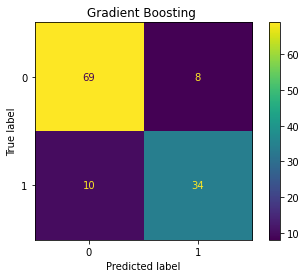

In [729]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=GBC.classes_)
disp.plot()
plt.title('Gradient Boosting ')
plt.show()

In [730]:
# get importance of features
importance_df = pd.DataFrame({'Importance of features': GBC.feature_importances_}, index = df_train_sc.columns)
importance_df.sort_values('Importance of features', ascending = False).head(10)

,Importance of features
MMSE,0.421151
nWBV,0.156757
eTIV,0.141474
Educ,0.133505
Age,0.065416
SES,0.049058
gender,0.032639


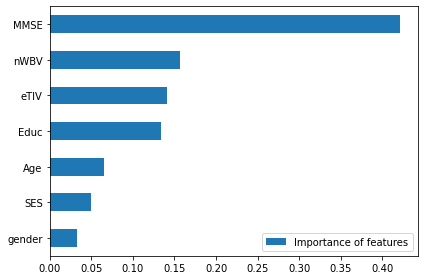

In [731]:
# plot the importance of features
importance_df.sort_values('Importance of features', ascending = True).plot.barh()
plt.tight_layout()
plt.show()

**KNeighborsClassifier**

In [724]:
# create Knc model with the optimum value for n_neighbors
knc = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto')
#fit the model using scaled train data 
knc.fit(df_train_sc, y_train)
# test the model on scaled test data 
y_pred_knc = knc.predict(df_test_sc)

In [725]:
print(classification_report(y_test,y_pred_knc))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        77
           1       0.84      0.84      0.84        44

    accuracy                           0.88       121
   macro avg       0.88      0.88      0.88       121
weighted avg       0.88      0.88      0.88       121



**Unfortunatelly KNC does not have feature importance attribute**

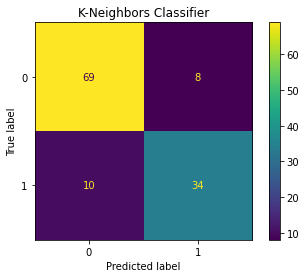

In [732]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=knc.classes_)
disp.plot()
plt.title('K-Neighbors Classifier')
plt.show()

### 3.4.2 Optimum Model<a class="NN" id="Optimum"></a>

Kneighbor classifer has better performance in recall, it has less false negative. 

In [737]:
# create Knc model with the optimum value for n_neighbors
knc = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto')
#fit the model using scaled train data 
knc.fit(df_train_sc, y_train)
# test the model on scaled test data 
y_pred_knc = knc.predict(df_test_sc)
  

### 3.4.3. Save Model<a class="NN" id="save"></a>

In [738]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(knc, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(df_test_sc, y_test)
print(result)

0.8842975206611571


## 3.5. Recomendation<a class="NN" id="Recommend"></a>

- Two models have better performance compared with other model, K-neighbor classifier (Recall = 84) and gradient boosting classifer (recall = 77). 

- Based on feature importance from gradient classifer, Mini-Mental State Exam (MMSE) is the most important feature in predicting dementia.
  
- The outcome of the work can be used in basic and clinical neuroscience and as a supplement for clinical dementia rating
